# 📑 PROYECTO: Caso Ice Games

## 📝Descripción del proyecto


Ice Games es una tienda online que distribuye videojuegos a nivel mundial, ofreciendo títulos para múltiples plataformas como PlayStation, Xbox, Nintendo y PC. Su catálogo incluye una variedad de lanzamientos.<br>
Las reseñas de usuarios y expertos, los géneros, las plataformas (por ejemplo, Xbox o PlayStation) y los datos históricos sobre las ventas de juegos están disponibles en fuentes abiertas. <br>
El propósito principal es detectar patrones que indiquen qué juegos tienen mayor probabilidad de éxito, y así apoyar a Ice Games en la planificación de campañas publicitarias y la selección estratégica de productos.

## 🎯 Objetivo

Examinar una base de datos de ventas de videojuegos desde 1980 hasta 2017, en las regiones de Norteamérica, Europa, Japón y otras áreas del mundo. El propósito es evaluar las tendencias del mercado, identificar patrones de éxito y detectar oportunidades comerciales para videojuegos que están saliendo al mercado.

### 🗂️ Carga y revisión inicial de datos

In [1154]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [1155]:
df = pd.read_csv('games.csv')

In [1156]:
# Primer vistazo general
print("Forma del DataFrame:", df.shape)        # Número de filas y columnas
print("\nColumnas del DataFrame:\n", df.columns)  # Lista de nombres de columnas

# Tipos de datos, valores nulos y no nulos
print("\nResumen con .info():")
df.info()

# Primeras filas
print("\nPrimeras filas con .head():")
print(df.head())

# Estadísticas básicas para columnas numéricas
print("\nResumen estadístico:")
print(df.describe())

Forma del DataFrame: (16715, 11)

Columnas del DataFrame:
 Index(['Name', 'Platform', 'Year of Release', 'Genre', 'NA-sales', 'EU-sales',
       'JP-sales', 'Other-sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')

Resumen con .info():
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year of Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA-sales         16715 non-null  float64
 5   EU-sales         16715 non-null  float64
 6   JP-sales         16715 non-null  float64
 7   Other-sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory

### 🧹 Preprocesamiento de los datos

#### Estandarizar nombres de columnas

In [1157]:
# Cambiar los nombres de las columnas: minúsculas, sin espacios, y con guiones bajos
df.columns = (
    df.columns
    .str.strip()                 # eliminar espacios al inicio/final
    .str.lower()                 # pasar todo a minúsculas
    .str.replace(' ', '_')       # reemplazar espacios por _
    .str.replace('-', '_')       # reemplazar guiones por _
)
print("\nColumnas estandarizadas del DataFrame:\n", df.columns)


Columnas estandarizadas del DataFrame:
 Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')


#### Corregir tipo de datos

In [1158]:
# Ver los tipos de datos de cada columna
print(df.dtypes)

name                object
platform            object
year_of_release    float64
genre               object
na_sales           float64
eu_sales           float64
jp_sales           float64
other_sales        float64
critic_score       float64
user_score          object
rating              object
dtype: object


**Comentarios**

year_of_release    float64  ← Debería convertirse a entero.  
user_score         object  ← Analizar si contiene valores no numéricos para limpiarse y convertirse a float

In [1159]:
# Analizar los valores de la columna user_score
print("\nValores únicos en 'user_score':")
print(df['user_score'].unique())


Valores únicos en 'user_score':
['8' nan '8.3' '8.5' '6.6' '8.4' '8.6' '7.7' '6.3' '7.4' '8.2' '9' '7.9'
 '8.1' '8.7' '7.1' '3.4' '5.3' '4.8' '3.2' '8.9' '6.4' '7.8' '7.5' '2.6'
 '7.2' '9.2' '7' '7.3' '4.3' '7.6' '5.7' '5' '9.1' '6.5' 'tbd' '8.8' '6.9'
 '9.4' '6.8' '6.1' '6.7' '5.4' '4' '4.9' '4.5' '9.3' '6.2' '4.2' '6' '3.7'
 '4.1' '5.8' '5.6' '5.5' '4.4' '4.6' '5.9' '3.9' '3.1' '2.9' '5.2' '3.3'
 '4.7' '5.1' '3.5' '2.5' '1.9' '3' '2.7' '2.2' '2' '9.5' '2.1' '3.6' '2.8'
 '1.8' '3.8' '0' '1.6' '9.6' '2.4' '1.7' '1.1' '0.3' '1.5' '0.7' '1.2'
 '2.3' '0.5' '1.3' '0.2' '0.6' '1.4' '0.9' '1' '9.7']


In [1160]:
# Remplazar valores no numericos como 'tbd' por NaN y convertir a float
df['user_score'] = df['user_score'].replace('tbd', np.nan).astype(float)
# Critic_score tiene una valoración de 0 a 100 , mientras que user_score tiene una valoracion de 1 a 10
# por lo que se toma la decisión de llevar ambas columnas a la misma base (100).
# Se convierte los valores de user_score a base 100.
df['user_score'] = df['user_score'] * 10
# Imprimir con describe para ver las estadísticas de la columna 'user_score'
print("\nEstadísticas de 'user_score':")
print(df['user_score'].describe())
print("\nTipo de dato de 'user_score':", df['user_score'].dtype)


Estadísticas de 'user_score':
count    7590.000000
mean       71.250461
std        15.000061
min         0.000000
25%        64.000000
50%        75.000000
75%        82.000000
max        97.000000
Name: user_score, dtype: float64

Tipo de dato de 'user_score': float64


In [1161]:
# Analizar que valores hay en la columna 'year_of_release'
print("\nValores únicos en 'year_of_release':")
print(df['year_of_release'].unique())


Valores únicos en 'year_of_release':
[2006. 1985. 2008. 2009. 1996. 1989. 1984. 2005. 1999. 2007. 2010. 2013.
 2004. 1990. 1988. 2002. 2001. 2011. 1998. 2015. 2012. 2014. 1992. 1997.
 1993. 1994. 1982. 2016. 2003. 1986. 2000.   nan 1995. 1991. 1981. 1987.
 1980. 1983.]


In [1162]:
# Contar cuantos valores nulos hay en 'year_of_release'
print("\nCantidad de valores nulos en 'year_of_release':", df['year_of_release'].isna().sum())


Cantidad de valores nulos en 'year_of_release': 269


In [1163]:
# Se crea un diccionario con los años de lanzamiento de algunos juegos
# y plataformas específicas para completar los valores faltantes en 'year_of_release'.
launch_years = {
    ('Madden NFL 2004', 'PS2'): 2003,
    ('FIFA Soccer 2004', 'PS2'): 2003,
    ('LEGO Batman: The Videogame', 'Wii'): 2008,
    ('wwe Smackdown vs. Raw 2006', 'PS2'): 2006,
    ('Space Invaders', '2600'): 1980,
    ('Rock Band', 'X360'): 2007,
    ("Frogger's Adventures: Temple of the Frog", 'GBA'): 2001,
    ('LEGO Indiana Jones: The Original Adventures', 'Wii'): 2008,
    ('Call of Duty 3', 'Wii'): 2006,
    ('Rock Band', 'Wii'): 2007,
    ('Call of Duty: Black Ops', 'PC'): 2010,
    ('Rock Band', 'PS3'): 2007,
    ('Triple Play 99', 'PS'): 1998,
    ('Adventure', '2600'): 1979,
    ('LEGO Batman: The Videogame', 'PSP'): 2008,
    ('Combat', '2600'): 1977,
    ('LEGO Harry Potter: Years 5-7', 'Wii'): 2011,
    ('NASCAR Thunder 2003', 'PS2'): 2002,
    ('Hitman 2: Silent Assassin', 'XB'): 2002,
    ('Rock Band', 'PS2'): 2007,
    ('Legacy of Kain: Soul Reaver', 'PS'): 1999,
    ('Donkey Kong Land III', 'GB'): 1997,
    ('Air-Sea Battle', '2600'): 1977,
    ('Suikoden III', 'PS2'): 2002,
    ('LEGO Harry Potter: Years 5-7', 'X360'): 2011,
    ('Wheel of Fortune', 'PS2'): 2003,
    ('Yakuza 4', 'PS3'): 2010,
    ('LEGO Harry Potter: Years 5-7', 'PS3'): 2011,
    ('Namco Museum', 'XB'): 2007,
    ('Rhythm Heaven', 'Wii'): 2008,
    ('The Lord of the Rings: War in the North', 'X360'): 2011,
    ('Madden NFL 07', 'PSP'): 2006,
    ('MLB SlugFest 20-03', 'PS2'): 2003,
    ('The Lord of the Rings: War in the North', 'PS3'): 2011,
    ('Shaun White Snowboarding', 'X360'): 2008,
    ('PES 2009: Pro Evolution Soccer', 'PSP'): 2008,
    ('WarioWare: Twisted!', 'GBA'): 2004,
    ('Madden NFL 11', 'Wii'): 2010,
    ('Test Drive Unlimited 2', 'X360'): 2011,
    ('The Chronicles of Narnia: The Lion, The Witch ...', 'GBA'): 2005,
    ('LEGO Harry Potter: Years 5-7', 'DS'): 2011,
    ('Monster Hunter 2', 'PS2'): 2006,
    ('Metal Gear Solid 2: Substance', 'XB'): 2002,
    ('Test Drive Unlimited 2', 'PS3'): 2011,
    ('Advance Wars: Days of Ruin', 'DS'): 2008,
    ('The Golden Compass', 'Wii'): 2007,
    ('Madden NFL 06', 'X360'): 2005,
    ('NASCAR: Dirt to Daytona', 'PS2'): 2002,
    ('Madden NFL 2002', 'XB'): 2001,
    ('Def Jam: Fight for NY', 'XB'): 2004,
    ('NBA Street Vol. 2', 'GC'): 2003,
    ('Fishing Derby', '2600'): 1980,
    ('Wet', 'X360'): 2009,
    ('Sonic the Hedgehog', 'PS3'): 2006,
    ('Karate', '2600'): 1982,
    ('Tiger Woods PGA Tour 07', 'Wii'): 2006,
    ('Circus Atari', '2600'): 1977,
    ('The Chronicles of Riddick: Escape from Butcher...', 'XB'): 2004,
    ('Maze Craze: A Game of Cops \'n Robbers', '2600'): 1978,
    ('Silent Hill: Homecoming', 'X360'): 2008,
    ('Super Breakout', '2600'): 1978,
    ('Robert Ludlum\'s The Bourne Conspiracy', 'X360'): 2008,
    ('NHL Slapshot', 'Wii'): 2009,
    ('TERA', 'PC'): 2011,
    ('NFL GameDay 2003', 'PS2'): 2002,
    ('LEGO Harry Potter: Years 5-7', '3DS'): 2011,
    ('Harvest Moon: Save the Homeland', 'PS2'): 2003,
    ('Robert Ludlum\'s The Bourne Conspiracy', 'PS3'): 2008,
    ('Silent Hill: Homecoming', 'PS3'): 2008,
    ('Hangman', '2600'): 1977,
    ('The Golden Compass', 'PSP'): 2007,
    ('NBA Live 2003', 'XB'): 2002,
    ('Cubix Robots for Everyone: Clash \'n\' Bash', 'GBA'): 2002,
    ('Dragon Ball Z: Budokai Tenkaichi 2', 'Wii'): 2006,
    ('Tropico 4', 'X360'): 2011,
    ('Tomb Raider (2013)', 'PC'): 2013,
    ('Bejeweled 3', 'DS'): 2010,
    ('Custom Robo', 'N64'): 1999,
    ('Final Fantasy XI', 'PS2'): 2003,
    ('Singularity', 'X360'): 2010,
    ('Dragster', '2600'): 1980,
    ('All-Star Baseball 2005', 'PS2'): 2005,
    ('Star Wars Jedi Knight II: Jedi Outcast', 'XB'): 2002,
    ('Slot Machine', '2600'): 1977,
    ('The Dukes of Hazzard II: Daisy Dukes It Out', 'PS'): 2000,
    ('Harvest Moon: The Tale of Two Towns', '3DS'): 2011,
    ('NBA Live 2003', 'GC'): 2002,
    ('Shrek the Third', 'DS'): 2007,
    ('Nicktoons: Battle for Volcano Island', 'GC'): 2006,
    ('Haven: Call of the King', 'PS2'): 2002,
    ('Unreal Championship 2: The Liandri Conflict', 'XB'): 2005,
    ('The Chronicles of Narnia: The Lion, The Witch ...', 'GC'): 2005,
    ('Pac-Man Fever', 'GC'): 2001,
    ('The Legend of Zelda: The Minish Cap', 'GBA'): 2004,
    ('Indy 500', '2600'): 1977,
    ('Disgaea 3: Absence of Detention', 'PSV'): 2010,
    ('Flag Capture', '2600'): 1977,
    ('Gun', 'X360'): 2005,
    ('Rock Revolution', 'PS3'): 2008,
    ('LEGO Harry Potter: Years 5-7', 'PSP'): 2011,
    ('College Hoops 2K6', 'PS2'): 2005,
    ('Jonah Lomu Rugby Challenge', 'PS3'): 2007,
    ('Mega Man X Collection', 'PS2'): 2006,
    ('BioShock 2', 'PC'): 2010,
    ('Singularity', 'PS3'): 2010,
    ('Danganronpa: Trigger Happy Havoc', 'PSP'): 2010,
    ('Jet X20', 'PS2'): 2004,
    ('Tony Hawk\'s Downhill Jam', 'Wii'): 2006,
    ('Tribes: Aerial Assault', 'PS2'): 2002,
    ('Big Beach Sports 2', 'Wii'): 2007,
    ('LEGO Harry Potter: Years 5-7', 'PC'): 2011,
    ('Yu Yu Hakusho: Dark Tournament', 'PS2'): 2004,
    ('Ghostbusters II', '2600'): 1989,
    ('Breakaway IV', '2600'): 1980,
    ('Robotech: Battlecry', 'XB'): 2002,
    ('Move Fitness', 'PS3'): 2010,
    ('Valkyria Chronicles III: Unrecorded Chronicles', 'PSP'): 2011,
    ('DanceDanceRevolution II', 'Wii'): 2007,
    ('WRC: FIA World Rally Championship', 'PS3'): 2010,
    ('Famista 64', 'N64'): 1997,
    ('Dead Space 3', 'PC'): 2013,
    ('Test Drive Unlimited 2', 'PC'): 2011,
    ('Pet Zombies', '3DS'): 2011,
    ('Star Trek: Legacy', 'X360'): 2006,
    ('Backbreaker', 'X360'): 2007,
    ('Twisted Metal: Small Brawl', 'PS'): 2001,
    ('Otomedius Excellent', 'X360'): 2008,
    ('NBA Starting Five', 'PS2'): 2003,
    ('Teen Titans', 'GBA'): 2005,
    ('Trauma Team', 'Wii'): 2010,
    ('Backbreaker', 'PS3'): 2007,
    ('James Cameron\'s Dark Angel', 'PS2'): 2002,
    ('Sword of the Samurai', 'PS2'): 1999,
    ('Splatterhouse', 'PS3'): 2010,
    ('Alone in the Dark: The New Nightmare', 'PS'): 2001,
    ('Vegas Party', 'Wii'): 2007,
    ('Jurassic Park: The Game', 'X360'): 2011,
    ('Home Run', '2600'): 1981,
    ('eJay Clubworld', 'PS2'): 2004,
    ('All-Star Baseball 2005', 'XB'): 2005,
    ('Bejeweled 3', 'PS3'): 2010,
    ('Our House Party!', 'Wii'): 2008,
    ('WCW Backstage Assault', 'N64'): 1999,
    ('Bejeweled 3', 'X360'): 2010,
    ('Disney\'s Cinderella: Magical Dreams', 'GBA'): 2005,
    ('Transworld Surf', 'XB'): 2001,
    ('Street Fighter IV', 'PC'): 2009,
    ('Nintendo Puzzle Collection', 'GC'): 2003,
    ('Charm Girls Club: My Fashion Mall', 'DS'): 2010,
    ('Record of Agarest War Zero', 'PS3'): 2010,
    ('Rocksmith', 'PC'): 2011,
    ('Super Robot Wars OG Saga: Masou Kishin II - Re...', 'PSP'): 2010,
    ('Saru! Get You! Million Monkeys', 'PS2'): 2005,
    ('Street Hoops', 'GC'): 2002,
    ('WRC: FIA World Rally Championship', 'X360'): 2010,
    ('Godzilla: Destroy All Monsters Melee', 'XB'): 2002,
    ('The Daring Game for Girls', 'DS'): 2007,
    ('Major League Baseball 2K6', 'PSP'): 2006,
    ('Star Trek: Conquest', 'PS2'): 2007,
    ('GiFTPiA', 'GC'): 2003,
    ('Happy Feet Two', 'PS3'): 2011,
    ('Disney\'s Chicken Little: Ace In Action', 'Wii'): 2006,
    ('Atsumare! Power Pro Kun no DS Koushien', 'DS'): 2007,
    ('My Healthy Cooking Coach', 'DS'): 2009,
    ('Happy Feet Two', 'DS'): 2011,
    ('Luminous Arc 2 (JP sales)', 'DS'): 2010,
    ('Happy Feet Two', 'X360'): 2011,
    ('Egg Monster Hero', 'DS'): 2006,
    ('The Daring Game for Girls', 'Wii'): 2007,
    ('Demon Chaos', 'PS2'): 2005,
    ('Samurai Shodown Anthology', 'PSP'): 2007,
    ('Action Man-Operation Extreme', 'PS'): 2000,
    ('Super Puzzle Fighter II', 'GBA'): 2000,
    ('Charm Girls Club: My Fashion Show', 'DS'): 2010,
    ('Face Racers: Photo Finish', '3DS'): 2012,
    ('Zero: Tsukihami no Kamen', 'Wii'): 2010,
    ('The Hidden', '3DS'): 2013,
    ('Get Fit with Mel B', 'X360'): 2010,
    ('Rock Revolution', 'Wii'): 2008,
    ('Happy Feet Two', 'Wii'): 2011,
    ('Mega Man Battle Network: Operation Shooting Star', 'DS'): 2006,
    ('Smashing Drive', 'GC'): 2000,
    ('Port Royale 3', 'PS3'): 2011,
    ('Dream Trigger 3D', '3DS'): 2011,
    ('Dead Island: Riptide', 'PC'): 2013,
    ('Yoostar on MTV', 'X360'): 2009,
    ('Tornado', 'DS'): 2010,
    ('McFarlane\'s Evil Prophecy', 'PS2'): 2006,
    ('Drake of the 99 Dragons', 'XB'): 2003,
    ('Build-A-Bear Workshop: Friendship Valley', 'Wii'): 2007,
    ('Rayman Arena', 'XB'): 2008,
    ('Port Royale 3', 'X360'): 2011,
    ('National Geographic Challenge!', 'X360'): 2007,
    ('Alex Rider: Stormbreaker', 'DS'): 2006,
    ('Chou Soujuu Mecha MG', 'DS'): 2008,
    ('Prinny: Can I Really Be The Hero? (US sales)', 'PSP'): 2008}
print(launch_years)

{('Madden NFL 2004', 'PS2'): 2003, ('FIFA Soccer 2004', 'PS2'): 2003, ('LEGO Batman: The Videogame', 'Wii'): 2008, ('wwe Smackdown vs. Raw 2006', 'PS2'): 2006, ('Space Invaders', '2600'): 1980, ('Rock Band', 'X360'): 2007, ("Frogger's Adventures: Temple of the Frog", 'GBA'): 2001, ('LEGO Indiana Jones: The Original Adventures', 'Wii'): 2008, ('Call of Duty 3', 'Wii'): 2006, ('Rock Band', 'Wii'): 2007, ('Call of Duty: Black Ops', 'PC'): 2010, ('Rock Band', 'PS3'): 2007, ('Triple Play 99', 'PS'): 1998, ('Adventure', '2600'): 1979, ('LEGO Batman: The Videogame', 'PSP'): 2008, ('Combat', '2600'): 1977, ('LEGO Harry Potter: Years 5-7', 'Wii'): 2011, ('NASCAR Thunder 2003', 'PS2'): 2002, ('Hitman 2: Silent Assassin', 'XB'): 2002, ('Rock Band', 'PS2'): 2007, ('Legacy of Kain: Soul Reaver', 'PS'): 1999, ('Donkey Kong Land III', 'GB'): 1997, ('Air-Sea Battle', '2600'): 1977, ('Suikoden III', 'PS2'): 2002, ('LEGO Harry Potter: Years 5-7', 'X360'): 2011, ('Wheel of Fortune', 'PS2'): 2003, ('Yakuz

In [1164]:
# Se crea una función para rellenar los valores faltantes en 'year_of_release' con los valores del nuevo diccionario
def fill_year(row):
    # Si ya tiene año, lo deja; si no, intenta rellenar con el diccionario
    if pd.notna(row['year_of_release']):
        return row['year_of_release']
    return launch_years.get((row['name'], row['platform']), row['year_of_release'])

df['year_of_release'] = df.apply(fill_year, axis=1)

# Volver a mostrar las cantidades de valores nulos en 'year_of_release'
print("\nCantidad de valores nulos en 'year_of_release':", df['year_of_release'].isna().sum())


Cantidad de valores nulos en 'year_of_release': 79


In [1165]:
# Imputar un valor absurdo o negativo que este fuera del dominio para reconocerlo a los valores Nan
df['year_of_release'] = df['year_of_release'].fillna(-1)
# cambiar el tipo de dato de 'year_of_release' a int
df['year_of_release'] = df['year_of_release'].astype(int)
# verificar el tipo de dato de year_of_release
print("\nTipo de dato de 'year_of_release':", df['year_of_release'].dtype)


Tipo de dato de 'year_of_release': int64


#### Revisar y tratar valores faltantes

In [1166]:
# Mostrar valores faltantes de todas las columnas
print("\nValores faltantes en todas las columnas:")
print(df.isna().sum())


Valores faltantes en todas las columnas:
name                  2
platform              0
year_of_release       0
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         9125
rating             6766
dtype: int64


In [1167]:
# Revisar el data frame donde name y genre son NaN
print("\nFilas donde 'name' y 'genre' son NaN:")
print(df[df['name'].isna() | df['genre'].isna()])


Filas donde 'name' y 'genre' son NaN:
      name platform  year_of_release genre  na_sales  eu_sales  jp_sales  \
659    NaN      GEN             1993   NaN      1.78      0.53      0.00   
14244  NaN      GEN             1993   NaN      0.00      0.00      0.03   

       other_sales  critic_score  user_score rating  
659           0.08           NaN         NaN    NaN  
14244         0.00           NaN         NaN    NaN  


In [1168]:
# Eliminar las filas donde name o genre son NaN
df = df.dropna(subset=['name', 'genre'])

In [1169]:
# Revisar y tratar valores faltantes    
print("\nValores nulos por columna:")
print(df.isnull().sum())



Valores nulos por columna:
name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8576
user_score         9123
rating             6764
dtype: int64


In [1170]:
# Reemplazar los valores NaN en 'critic_score' y 'user_score' por la mediana de su plataforma
# En caso de que no exista la mediana para una plataforma, se deja reemplaza por la mediana global.
# Paso 1: Calcular medianas por plataforma
medianas_plat = df.groupby('platform')[['critic_score', 'user_score']].median()

# Paso 2: Función que aplica la mediana por plataforma (si existe)
def rellenar_con_mediana_plataforma(row):
    platform = row['platform']
    if pd.isna(row['critic_score']):
        row['critic_score'] = medianas_plat.loc[platform, 'critic_score'] if not pd.isna(medianas_plat.loc[platform, 'critic_score']) else row['critic_score']
    if pd.isna(row['user_score']):
        row['user_score'] = medianas_plat.loc[platform, 'user_score'] if not pd.isna(medianas_plat.loc[platform, 'user_score']) else row['user_score']
    return row

# Paso 3: Aplicar función al DataFrame
df = df.apply(rellenar_con_mediana_plataforma, axis=1)

# Paso 4: Llenar cualquier NaN restante con la mediana global
df['critic_score'].fillna(df['critic_score'].median(), inplace=True)
df['user_score'].fillna(df['user_score'].median(), inplace=True)
# Paso 5: Verificar que no queden NaN
print("\nValores nulos después de imputación:")
print(df.isnull().sum())


Valores nulos después de imputación:
name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score          0
user_score            0
rating             6764
dtype: int64


C:\Users\ceci-\AppData\Local\Temp\ipykernel_21364\1548190991.py:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['critic_score'].fillna(df['critic_score'].median(), inplace=True)
C:\Users\ceci-\AppData\Local\Temp\ipykernel_21364\1548190991.py:20: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behav

In [1171]:
# Visualizar los valores de la columna rating
print("\nValores únicos en 'rating':")
print(df['rating'].unique())
# Los valores nan de la columna 'rating' se reemplazan con rating pending
df['rating'] = df['rating'].fillna('Pending')
# Verificar que no queden valores nulos
print("\nValores únicos en 'rating':")
print(df['rating'].unique())


Valores únicos en 'rating':
['E' nan 'M' 'T' 'E10+' 'K-A' 'AO' 'EC' 'RP']

Valores únicos en 'rating':
['E' 'Pending' 'M' 'T' 'E10+' 'K-A' 'AO' 'EC' 'RP']


#### Valores duplicados

In [1172]:
# Mostrar cantidad de filas duplicadas
print("\nCantidad de filas duplicadas:", df.duplicated().sum())



Cantidad de filas duplicadas: 0


In [1173]:
# Mostrar filas donde se duplica name, platform y year of release
duplicados = df[df.duplicated(subset=['name', 'platform','year_of_release'], keep=False)]
# imprimir las filas duplicadas y ordenar por name
duplicados = duplicados.sort_values(by='name')
print("\nFilas duplicadas por 'name' y 'platform' y 'year_of_release':")
print(duplicados)


Filas duplicadas por 'name' y 'platform' y 'year_of_release':
                     name platform  year_of_release     genre  na_sales  \
604         Madden NFL 13      PS3             2012    Sports      2.11   
16230       Madden NFL 13      PS3             2012    Sports      0.00   
1745   Sonic the Hedgehog      PS3             2006  Platform      0.41   
4127   Sonic the Hedgehog      PS3             2006  Platform      0.00   

       eu_sales  jp_sales  other_sales  critic_score  user_score rating  
604        0.22      0.00         0.23          83.0        55.0      E  
16230      0.01      0.00         0.00          83.0        55.0      E  
1745       0.06      0.04         0.66          43.0        41.0   E10+  
4127       0.48      0.00         0.00          43.0        41.0   E10+  


In [1174]:
# Consolidar duplicados manteniendo solo una fila por ['name', 'platform', 'year_of_release', 'genre']
# Para 'critic_score' y 'user_score' se toma el promedio, para ventas se toma la suma,
# el resto el primer valor

df = df.groupby(['name', 'platform', 'year_of_release', 'genre']).agg({
    'na_sales': 'sum',
    'eu_sales': 'sum',
    'jp_sales': 'sum',
    'other_sales': 'sum',
    'critic_score': 'mean',
    'user_score': 'mean',
    'rating': 'first'
}).reset_index()
print(df[df.duplicated(subset=['name', 'platform','year_of_release'], keep=False)])


Empty DataFrame
Columns: [name, platform, year_of_release, genre, na_sales, eu_sales, jp_sales, other_sales, critic_score, user_score, rating]
Index: []


#### Transformación de datos

In [1175]:
# Se crea una columna para sumar las ventas totales
df['total_sales'] = df[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)

In [1176]:
# Se crea una columna para agrupar las plataformas en Nintendo, PC, PlayStation, Xbox y Others
def agrupar_plataformas(x):
    
    if x in ['3DS','DS','GB','GBA','GC','N64','NES','SNES','Wii','WiiU']:

        return "Nintendo"

    elif x in ['PC','PCFX']:

        return "PC"

    elif x in ['PS','PS2','PS3','PS4','PSP','PSV']:

        return "Playstation"

    elif x in ['X360','XB','XOne']:

        return "Xbox"

    else:

        return "Other"
    
df['platform_group'] = df['platform'].apply(agrupar_plataformas)

In [1177]:
#Hacer una columna donde se identifique el tipo de plataforma: Portable_console or Home_console.
def game_consoles (x):

    if x in ['3DS', 'DS', 'GB', 'GBA', 'PSP', 'PSV', 'WS']:

        return "Portable console"

    elif x in ['2600', '3DO', 'DC', 'GC', 'GEN', 'GG', 'N64', 'NES', 'NG', 'PC', 'PCFX', 'PS', 'PS2', 'PS3', 'PS4', 'SAT', 'SCD', 'SNES', 'TG16', 'Wii', 'WiiU', 'X360', 'XB', 'XOne']:

        return "Home console"

    else:

        return "Other"
    
df['console_type'] = df['platform'].apply(game_consoles)


In [1178]:
# Crea una nueva columna llamada rating_sem que agrupa los ratings en categorías más comprensibles
def rat_sem(x):
    if x in ['E', 'K-A', 'EC']:
        return "everyone"
    elif x in ['T']:
        return "teen"
    elif x in ['M']:
        return "mature"
    elif x in ['E10+']:
        return "everyone 10 and older"
    elif x in ['AO']:
        return "adults only"
    else:
        return "pending"
df['rating_sem'] = df['rating'].apply(rat_sem)

In [1179]:
# Imprimir las primeras filas del DataFrame para verificar los cambios
print("\nPrimeras filas del DataFrame después de las transformaciones:")
display(df.head())


Primeras filas del DataFrame después de las transformaciones:


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales,platform_group,console_type,rating_sem
0,Beyblade Burst,3DS,2016,Role-Playing,0.00,0.00,0.03,0.00,68.0,71.0,Pending,0.03,Nintendo,Portable console,pending
1,Fire Emblem Fates,3DS,2015,Role-Playing,0.81,0.23,0.52,0.11,68.0,71.0,Pending,1.67,Nintendo,Portable console,pending
2,Frozen: Olaf's Quest,3DS,2013,Platform,0.27,0.27,0.00,0.05,68.0,71.0,Pending,0.59,Nintendo,Portable console,pending
3,Frozen: Olaf's Quest,DS,2013,Platform,0.21,0.26,0.00,0.04,66.0,74.0,Pending,0.51,Nintendo,Portable console,pending
4,Haikyu!! Cross Team Match!,3DS,2016,Adventure,0.00,0.00,0.04,0.00,68.0,71.0,Pending,0.04,Nintendo,Portable console,pending


In [1180]:
# corregir el año de lanzamiento de Strongest Tokyo University Shogi DS a 2007
df.loc[df['name'] == 'Strongest Tokyo University Shogi DS', 'year_of_release'] = 2007

In [1181]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16711 entries, 0 to 16710
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16711 non-null  object 
 1   platform         16711 non-null  object 
 2   year_of_release  16711 non-null  int64  
 3   genre            16711 non-null  object 
 4   na_sales         16711 non-null  float64
 5   eu_sales         16711 non-null  float64
 6   jp_sales         16711 non-null  float64
 7   other_sales      16711 non-null  float64
 8   critic_score     16711 non-null  float64
 9   user_score       16711 non-null  float64
 10  rating           16711 non-null  object 
 11  total_sales      16711 non-null  float64
 12  platform_group   16711 non-null  object 
 13  console_type     16711 non-null  object 
 14  rating_sem       16711 non-null  object 
dtypes: float64(7), int64(1), object(7)
memory usage: 1.9+ MB
None


#### Guardar datos limpios

In [1182]:
df.to_csv("games_clean.csv", index=False, header=True, sep=',')

### 🔍 Análisis Exploratorio

In [1183]:
df_games = pd.read_csv('games_clean.csv')

#### Cantidad de juegos a través de los años

In [1184]:
# Filtrar year_of_release que sean diferentes a -1
df_games_filtered = df_games.query('year_of_release != -1')

C:\Users\ceci-\AppData\Local\Temp\ipykernel_21364\2557541003.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_games_filtered, x='year_of_release', palette='viridis')


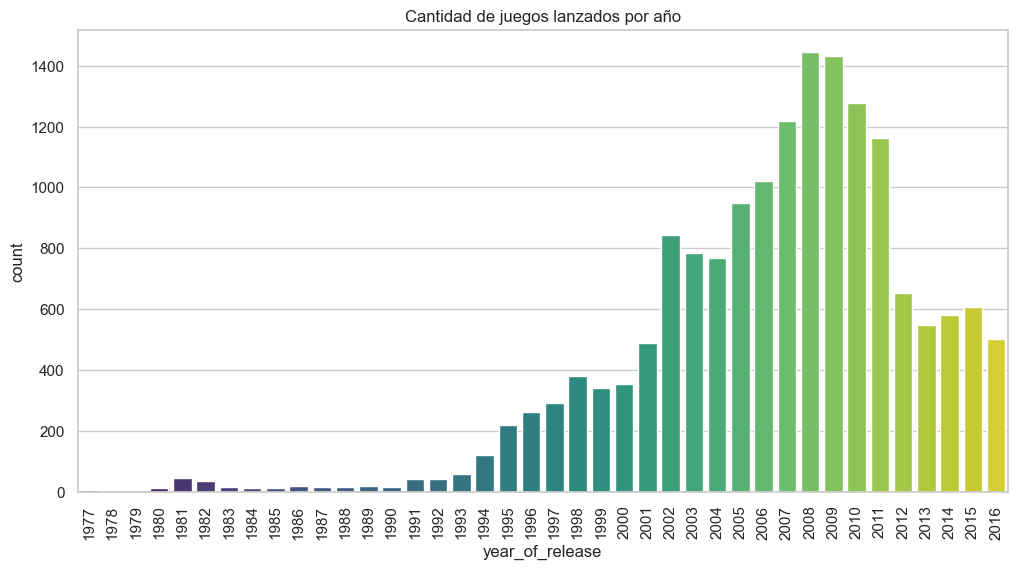

In [1185]:
# se hacer un grafico de lineas para ver la cantidad de juegos lanzados por año
plt.figure(figsize=(12, 6))
sns.countplot(data=df_games_filtered, x='year_of_release', palette='viridis')
plt.xticks(rotation=90)
plt.title('Cantidad de juegos lanzados por año')
plt.show()


**Comentario:**  
El gráfico de cantidad de juegos lanzados por año muestra claramente la evolución de la industria de los videojuegos. Se observa un crecimiento sostenido desde mediados de los años 90, alcanzando su punto máximo entre 2008 y 2009. Posteriormente, hay una disminución en el número de lanzamientos, lo que puede estar relacionado con cambios en el mercado, consolidación de plataformas, o nuevas tendencias como el contenido descargable y los juegos digitales. Este comportamiento refleja cómo la industria responde a la demanda y a la innovación tecnológica a lo largo del tiempo.

#### Análisis de ventas por grupo de plataforma

In [1186]:
# Filtrar el DataFrame para incluir solo los juegos lanzados a partir de 2010.
# Esto permite enfocar el análisis en datos recientes y relevantes para identificar tendencias 
# actuales del mercado.
df_games_filtered_1 = df_games_filtered.query('year_of_release >= 2010')

In [1187]:
# Grupo de plataformas con más ventas 
df_sale_per_platform_group = df_games_filtered_1.groupby('platform_group')['total_sales'].sum().reset_index()
df_sale_per_platform_group.columns = ['platform_group', 'sales']
df_sale_per_platform_group = df_sale_per_platform_group.sort_values(by='sales', ascending=False).reset_index(drop=True)
df_sale_per_platform_group

,platform_group,sales
0,Playstation,1031.39
1,Xbox,713.54
2,Nintendo,691.62
3,PC,125.40


C:\Users\ceci-\AppData\Local\Temp\ipykernel_21364\2412936202.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_sale_per_platform_group, x='platform_group', y='sales', palette='viridis')


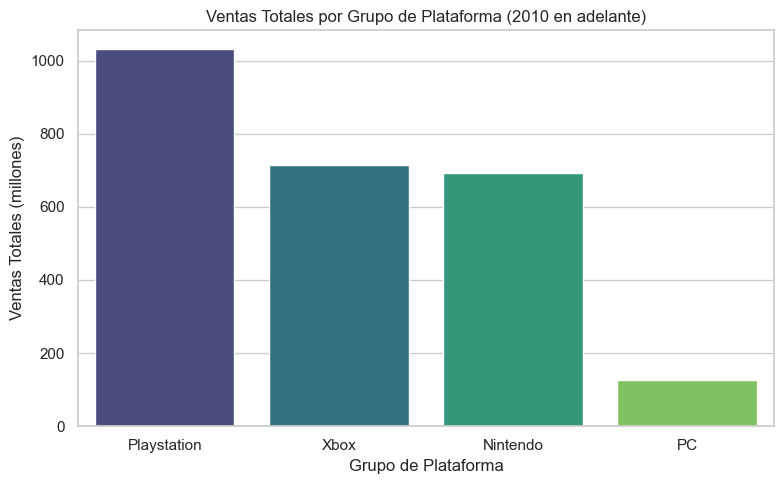

In [1188]:
# Gráfico de barras de ventas totales por grupo de plataforma
plt.figure(figsize=(8, 5))
sns.barplot(data=df_sale_per_platform_group, x='platform_group', y='sales', palette='viridis')
plt.title('Ventas Totales por Grupo de Plataforma (2010 en adelante)')
plt.xlabel('Grupo de Plataforma')
plt.ylabel('Ventas Totales (millones)')
plt.tight_layout()
plt.show()

**Comentario**
El gráfico de barras de ventas por grupo de plataformas muestra que PlayStation, Xbox y Nintendo son los grupos que han generado mayores ingresos en ventas desde 2010. Esto indica que estas marcas dominan el mercado de videojuegos en términos de ventas totales, mientras que PC ocupa una posición significativamente menor.

#### Análisis de ventas por plataforma

In [1189]:
# Hacer un dataframe que muestre las plataformas individuales con más ventas
df_sale_per_platform = df_games_filtered_1.groupby(['platform_group','console_type','platform',])['total_sales'].sum().reset_index()
df_sale_per_platform = df_sale_per_platform.sort_values(by='total_sales', ascending=False).reset_index(drop=True)
# Solo se toma en cuenta las 5 primeras plataformas con más ventas.
df_sale_per_platform = df_sale_per_platform.head(5) 
df_sale_per_platform

,platform_group,console_type,platform,total_sales
0,Playstation,Home console,PS3,592.33
1,Xbox,Home console,X360,554.22
2,Playstation,Home console,PS4,314.14
3,Nintendo,Portable console,3DS,258.95
4,Nintendo,Home console,Wii,225.25


In [1190]:
# Extraer en un lista las 5 plataformas con más ventas
first_plataforms = df_sale_per_platform['platform'].tolist()

# Imprimir la lista de las primeras 5 plataformas
print('\nLas plataformas con más ingresos de ventas son:', first_plataforms,'\n')


Las plataformas con más ingresos de ventas son: ['PS3', 'X360', 'PS4', '3DS', 'Wii'] 



In [1191]:
# Filtrar los datos para solo incluir las 5 plataformas con más ventas.
df_first_platforms = df_games_filtered_1[df_games_filtered_1['platform'].isin(first_plataforms)]

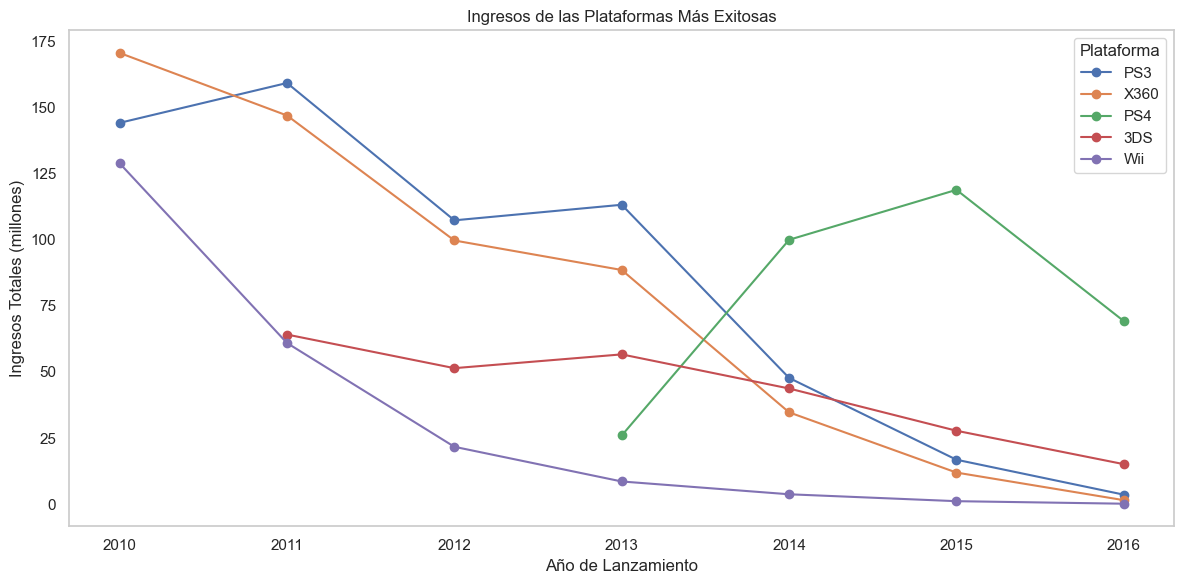

In [1192]:
plt.figure(figsize=(12, 6))
for plataforma in first_plataforms:
    datos = df_first_platforms[df_first_platforms['platform'] == plataforma]
    ventas_por_año = datos.groupby('year_of_release')['total_sales'].sum().reset_index()
    plt.plot(ventas_por_año['year_of_release'], ventas_por_año['total_sales'], marker='o', label=plataforma)

plt.title('Ingresos de las Plataformas Más Exitosas')
plt.xlabel('Año de Lanzamiento')
plt.ylabel('Ingresos Totales (millones)')
plt.legend(title='Plataforma')
plt.grid()
plt.tight_layout()
plt.show()

**Comentarios**
El gráfico muestra los ingresos totales acumulados generados por videojuegos desde su lanzamiento hasta el corte de datos (~2016/2017), según la plataforma. Se observa que los juegos lanzados en años anteriores (2010–2011) tienen mayores ingresos acumulados, ya que han estado más tiempo en el mercado. La disminución de ingresos en juegos más recientes no necesariamente refleja menor éxito, sino menor tiempo de ventas. La plataforma PS4 destaca por mostrar altos ingresos incluso en juegos lanzados recientemente, lo que evidencia su rápida adopción y éxito comercial. En contraste, plataformas como Wii y X360 dejan de ser relevantes en años posteriores, reflejando el fin de su ciclo de vida comercial.

#### Ciclo de vida por grupo de plataforma y tipo de consola

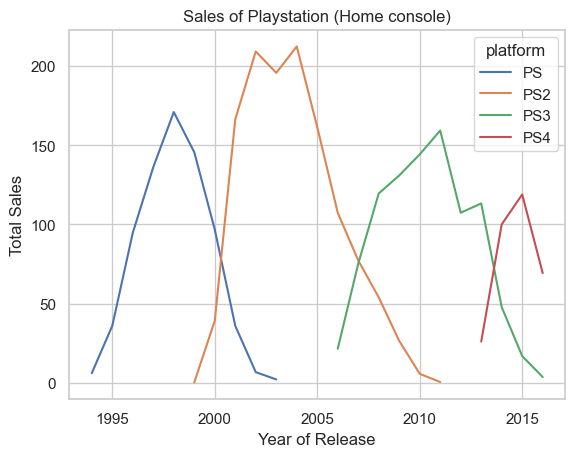

In [1193]:
#Crear una función para graficar un diagrama de lineas de las ventas por grupo de plataforma y tipo de consola
def plot_sales_by_platform(data, platform_group, console_type):
    # Filtrar el DataFrame
    df_sale_per_group = data[
        (data['platform_group'] == platform_group) & 
        (data['console_type'] == console_type)
    ]
    # Crear la tabla dinámica
    df_sales_table = df_sale_per_group.pivot_table(index="year_of_release", 
                                           values="total_sales", 
                                           columns="platform", 
                                           aggfunc="sum")
    # Mostrar el resultado en gráfico
    df_sales_table.plot(kind="line")
    plt.title(f'Sales of {platform_group} ({console_type})')
    plt.xlabel('Year of Release')
    plt.ylabel('Total Sales')
    plt.show()
# Graficar diagrama de líneas de ventas de las plataformas del grupo de Playstation y de tipo consola de sobremesa (Home Console)
plot_sales_by_platform(df_games_filtered, 'Playstation', 'Home console')

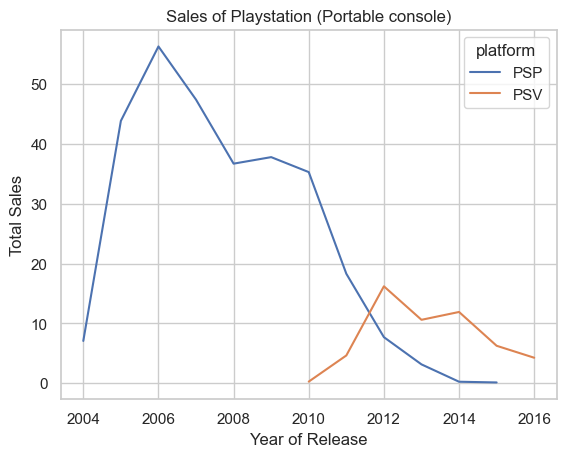

In [1194]:
# Graficar diagrama de líneas de ventas de las plataformas del grupo de Playstation y de tipo consola portátil (Potable Console)
plot_sales_by_platform(df_games_filtered, 'Playstation', 'Portable console')

Los gráficos reflejan un claro patrón de transición generacional dentro de cada grupo de plataformas. En consolas de sobremesa, cada nueva generación (PS2, PS3, PS4) reemplaza progresivamente a la anterior, con un descenso marcado en ventas de la consola anterior tras la aparición de su sucesora. En cambio, en consolas portátiles, aunque la PSP tuvo un ciclo exitoso, la PS Vita no logró consolidarse como su reemplazo, marcando un punto débil en la línea portátil de Sony.

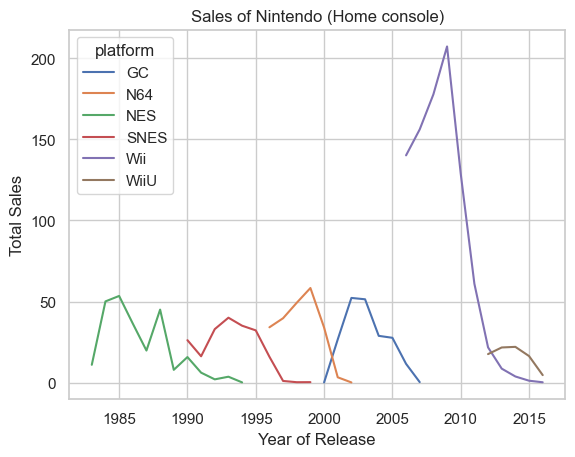

In [1195]:
# Graficar diagrama de líneas de ventas de las plataformas del grupo de Nintendo y de tipo consola de sobremesa (Home Console)
plot_sales_by_platform(df_games_filtered, 'Nintendo', 'Home console')

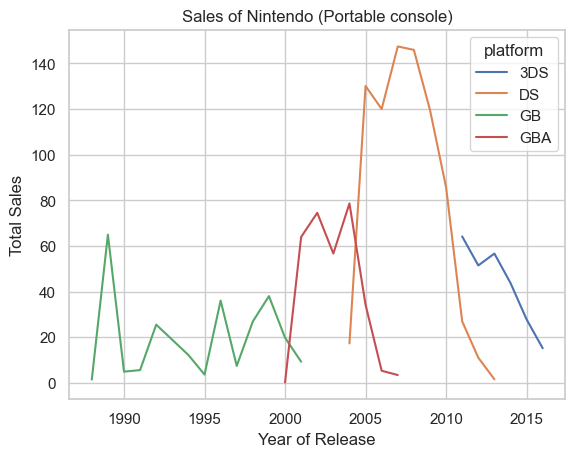

In [1196]:
# Graficar diagrama de líneas de ventas de las plataformas del grupo de Nintendo y de tipo consola portátil (Portable Console)
plot_sales_by_platform(df_games_filtered, 'Nintendo', 'Portable console')

Nintendo ha seguido una estrategia consistente y secuencial de lanzar nuevas plataformas que reemplazan a las anteriores, tanto en consolas caseras como portátiles. El éxito comercial varía considerablemente entre generaciones, con ciertos modelos (Wii y DS) sobresaliendo como fenómenos de ventas. Esta estrategia permite a la empresa mantener la atención del mercado mientras gestiona el ciclo de vida de sus productos de forma controlada.

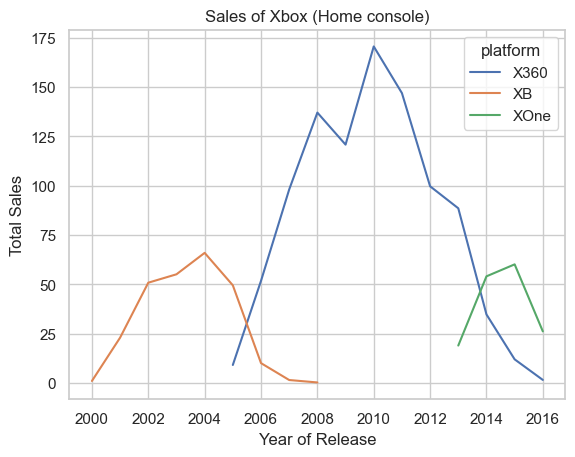

In [1197]:
# Graficar diagrama de líneas de ventas de las plataformas del grupo de Xbox y de tipo consola de sobremesa (Home Console)
plot_sales_by_platform(df_games_filtered, 'Xbox', 'Home console')

**Comentarios**
Los gráficos reflejan patrones claros en el ciclo de vida de las plataformas de videojuegos. Cada plataforma tiene un ciclo típico que incluye un período de introducción, crecimiento, madurez y eventualmente declive. A medida que nuevas plataformas son lanzadas (por ejemplo, PS4 después de PS3), la atención del mercado se desplaza hacia estas nuevas tecnologías, llevando a que las plataformas anteriores sean consideradas obsoletas.

#### Ciclo de vida de las plataformas más exitosas

In [1198]:
# Crea un diccionario llamado data, donde cada clave (platform_anterior, platform, platform_posterior) representa una
# lista de plataformas de videojuegos. 
data = {
    'platform_anterior': ['PS2', 'XB', 'PS3', 'DS', 'GC'], # Plataformas que salieron al mercado antes de las plataformas de la columna 'platform'
    'platform': ['PS3', 'X360', 'PS4', '3DS', 'Wii'],  # Plataformas más exitosas en ventas
    'platform_posterior': ['PS4', 'XOne', 'PS5', 'NS', 'WiiU']  # Plataformas que salieron al mercado después de las plataformas de la columna 'platform'
}
# Convertir el diccionario en data frame
df_platforms = pd.DataFrame(data)

# Agregar la columna 'platform_group' usando df_sale_per_platform
df_platforms = df_platforms.merge(
    df_sale_per_platform[['platform', 'platform_group']],
    on='platform',
    how='left'
)

# Crear una función para calcular los años que demoran en aparecer nuevas plataformas,
# años que tardan en desaparecer las antiguas y el ciclo de vida de plataformas exitosas.
def calculate_lifecycles(data_2, data_3):
    # Listas para almacenar resultados
    años_aparece = []
    años_desaparece = []
    ciclo_vida = []
    year_of_release_min = []
    year_of_release_max = []

    # Recorrer fila por fila del DataFrame de plataformas
    for index, row in data_2.iterrows():
        platform_1 = row['platform_anterior']
        platform_2 = row['platform']
        platform_3 = row['platform_posterior']
        
        # Filtrar el DataFrame
        df_1 = data_3[data_3['platform'] == platform_1]
        df_2 = data_3[data_3['platform'] == platform_2]
        df_3 = data_3[data_3['platform'] == platform_3]
        
        # Calcular años de aparición y desaparición
        años_aparece_val = df_2['year_of_release'].min() - df_1['year_of_release'].min()
        años_desaparece_val = df_2['year_of_release'].max() - df_3['year_of_release'].min() if not df_3.empty else None
        ciclo_vida_val = df_2['year_of_release'].max()-df_2['year_of_release'].min()
        year_of_release_min_val = df_2['year_of_release'].min()
        year_of_release_max_val = df_2['year_of_release'].max()
        
        # Agregar resultados a las listas
        años_aparece.append(años_aparece_val)
        años_desaparece.append(años_desaparece_val)
        ciclo_vida.append(ciclo_vida_val)
        year_of_release_min.append(year_of_release_min_val)
        year_of_release_max.append(year_of_release_max_val)

    # Agregar las listas como nuevas columnas al DataFrame original
    data_2['años_aparece'] = años_aparece
    data_2['años_desaparece'] = años_desaparece
    data_2['ciclo_vida'] = ciclo_vida
    data_2['year_of_release_min'] = year_of_release_min
    data_2['year_of_release_max'] = year_of_release_max
    
    return data_2

# Llamar a la función y obtener el DataFrame resultante
result_df = calculate_lifecycles(df_platforms, df_games_filtered)

# Mostrar el DataFrame resultante
print(result_df[['platform','años_aparece', 'años_desaparece','ciclo_vida','year_of_release_min','year_of_release_max']])

  platform  años_aparece  años_desaparece  ciclo_vida  year_of_release_min  \
0      PS3             7              3.0          10                 2006   
1     X360             5              3.0          11                 2005   
2      PS4             7              NaN           3                 2013   
3      3DS             7              NaN           5                 2011   
4      Wii             6              4.0          10                 2006   

   year_of_release_max  
0                 2016  
1                 2016  
2                 2016  
3                 2016  
4                 2016  


**Comentario** 

**Duración en el mercado:** Se puede observar que de el tiempo de ciclo de vida de las plataformas más exitosas entre 2010 al 2016 es en promedio 10 años, lo que sugiere que los consumidores son leales a una generación de plataformas durante un período considerable. De las plataformas PS4 y 3DS todavían siguen vigente en el 2016 y lo seguirán estando durante el 2017, por ello que de esas dos plataformas su ciclo de vida todavía no termina.

**Tiempo de aparición y desaparición:**
Años_aparece se refiere a los cuantos años las plataformas 'PS3', 'X360', 'PS4', '3DS', 'Wii' fueron lanzadas después de que su plataforma antecesora fuera lanzada.
Años_desparece se refiere a la cantidad de años que tarda en desaparecer la plataformas una vez su plataforma sucesora haya sido lanzada al mercado.

Tardan en aparecer las nuevas plataformas en promedio 6 años y tardan en desaparecer en promedio 3 años desde que sale su plataforma sucesora.

#### Diagrama de caja para las ventas globales

**Crear un diagrama de caja para las ventas globales de todos los juegos, desglosados por plataforma**

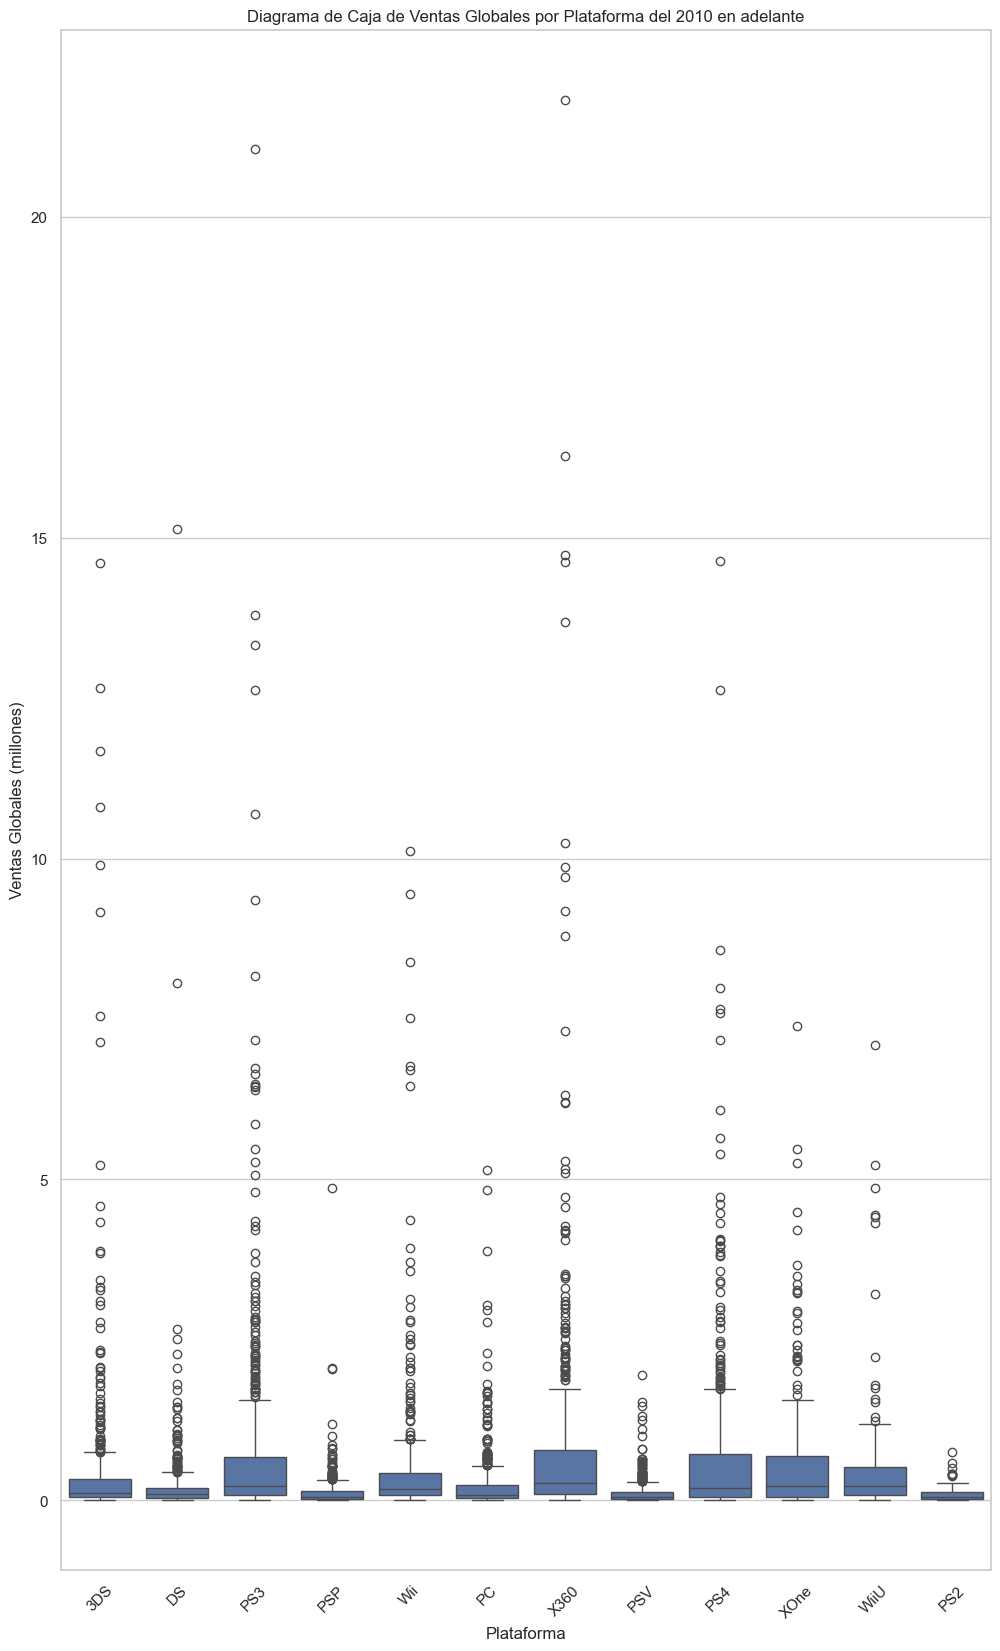

In [1199]:
# Crear el diagrama de caja
plt.figure(figsize=(12, 20))  
sns.boxplot(x='platform', y='total_sales', data=df_games_filtered_1)

# Personalizar el gráfico
plt.title('Diagrama de Caja de Ventas Globales por Plataforma del 2010 en adelante')
plt.xlabel('Plataforma')
plt.ylabel('Ventas Globales (millones)')
plt.xticks(rotation=45)  # Rotar etiquetas del eje x para mayor legibilidad

# Mostrar el gráfico
plt.show()

**Comentario**
En el diagrama se observa que las plataformas con más ventas son PS3, X360, PS4, X0ne, WiiU, Wii y 3DS. Podemos observar que las líneas dentro de las cajas que representa la mediana se acerca más al Q1, por lo que la distribución pudiera ser sesgada a la derecha en todos los casos. Es decir, la mayoría de los juegos tienen ventas relativamente bajas. También hay valores atípicos, lo que significa que hay algunos juegos que se han vendido excepcionalmente bien pero son pocos. En conclusión, un sesgo a la derecha podría indicar que, aunque muchos juegos no tienen un gran desempeño en ventas, hay un pequeño número de juegos que generan la mayor parte de las ventas.                           **Promedio vs. Mediana:** Si la distribución de ventas es sesgada a la derecha, es probable que la mediana (la línea dentro de la caja) sea menor que el promedio. Esto se debe a que unos pocos juegos con ventas excepcionalmente altas elevan el promedio, mientras que la mayoría de los juegos tienen ventas más bajas.

#### Identificar los juegos con más ventas dentro de plataformas más exitosas

In [1200]:
# Identificar los 5 juegos más exitosos (mayor total_sales) de cada plataforma exitosa
top_games_by_platform = {}

for plataforma in first_plataforms:
    top_juegos = df_games_filtered_1[df_games_filtered_1['platform'] == plataforma].nlargest(5, 'total_sales')[['name', 'platform', 'total_sales']]
    top_games_by_platform[plataforma] = top_juegos

# Unir todos los resultados en un solo DataFrame
df_top_games = pd.concat(top_games_by_platform.values(), ignore_index=True)
df_top_games

,name,platform,total_sales
0,Grand Theft Auto V,PS3,21.05
1,Call of Duty: Black Ops II,PS3,13.79
2,Call of Duty: Modern Warfare 3,PS3,13.33
3,Call of Duty: Black Ops,PS3,12.63
4,Gran Turismo 5,PS3,10.70
5,Kinect Adventures!,X360,21.82
6,Grand Theft Auto V,X360,16.27
7,Call of Duty: Modern Warfare 3,X360,14.73
8,Call of Duty: Black Ops,X360,14.62
9,Call of Duty: Black Ops II,X360,13.68


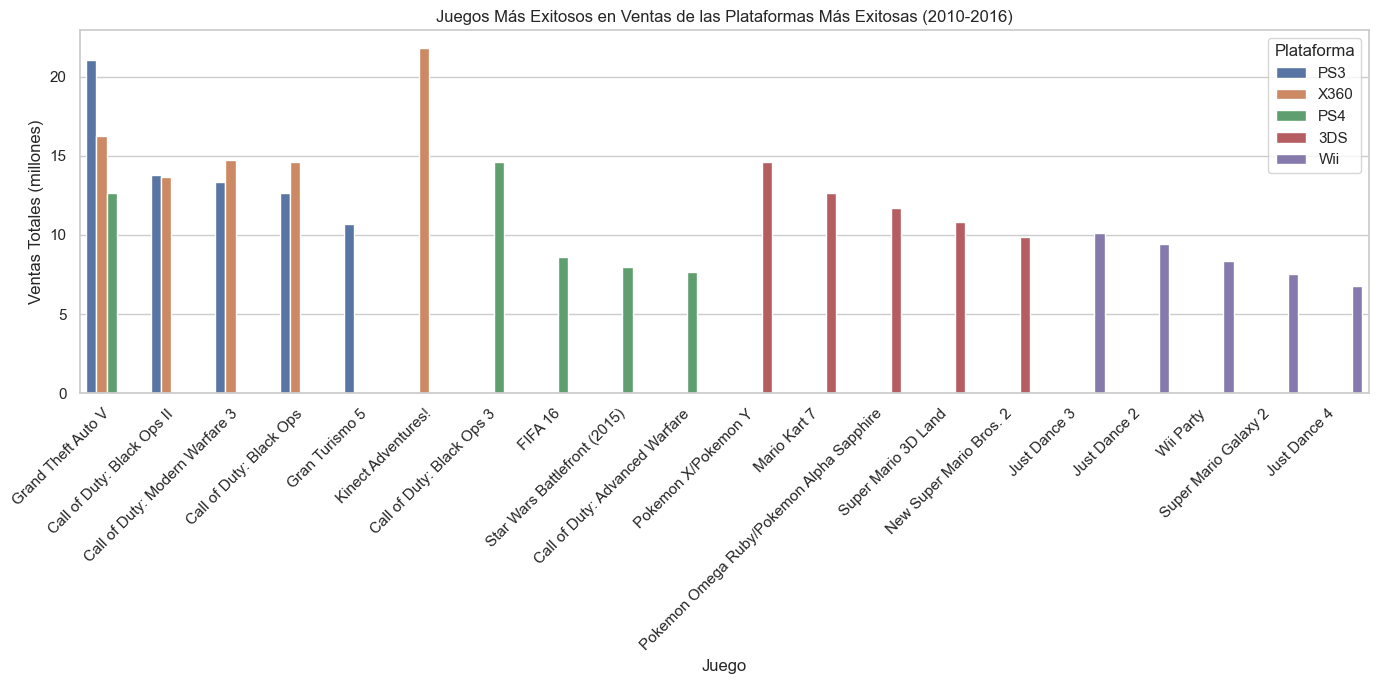

In [1201]:
# Gráfico de barras de los juegos más exitosos en ventas de las plataformas más exitosas
plt.figure(figsize=(14, 7))
sns.barplot(data=df_top_games, x='name', y='total_sales', hue='platform')
plt.title('Juegos Más Exitosos en Ventas de las Plataformas Más Exitosas (2010-2016)')
plt.xlabel('Juego')
plt.ylabel('Ventas Totales (millones)')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Plataforma')
plt.tight_layout()
plt.show()

1. Los juegos más exitosos en ventas suelen pertenecer a franquicias reconocidas y multiplataforma, como Grand Theft Auto, Call of Duty, FIFA y Just Dance.
2. Las plataformas PS3 y X360 concentran la mayor cantidad de títulos con ventas sobresalientes, lo que evidencia su dominio en el mercado durante el periodo analizado.

#### Identificar los 10 juegos mas exitosos

In [1202]:
# los 10 juegos más exitosos en ventas, pero identificado en que plataforma se encuentran
df_top_10_games = df_games_filtered_1.nlargest(10, 'total_sales')[['name', 'platform', 'total_sales']]
print("\nLos 10 juegos más exitosos en ventas:")
print(df_top_10_games)


Los 10 juegos más exitosos en ventas:
                                 name platform  total_sales
6923               Kinect Adventures!     X360        21.82
5309               Grand Theft Auto V      PS3        21.05
5311               Grand Theft Auto V     X360        16.27
10552     Pokemon Black/Pokemon White       DS        15.13
1862   Call of Duty: Modern Warfare 3     X360        14.73
1837        Call of Duty: Black Ops 3      PS4        14.63
1834          Call of Duty: Black Ops     X360        14.62
10582             Pokemon X/Pokemon Y      3DS        14.60
1841       Call of Duty: Black Ops II      PS3        13.79
1843       Call of Duty: Black Ops II     X360        13.68


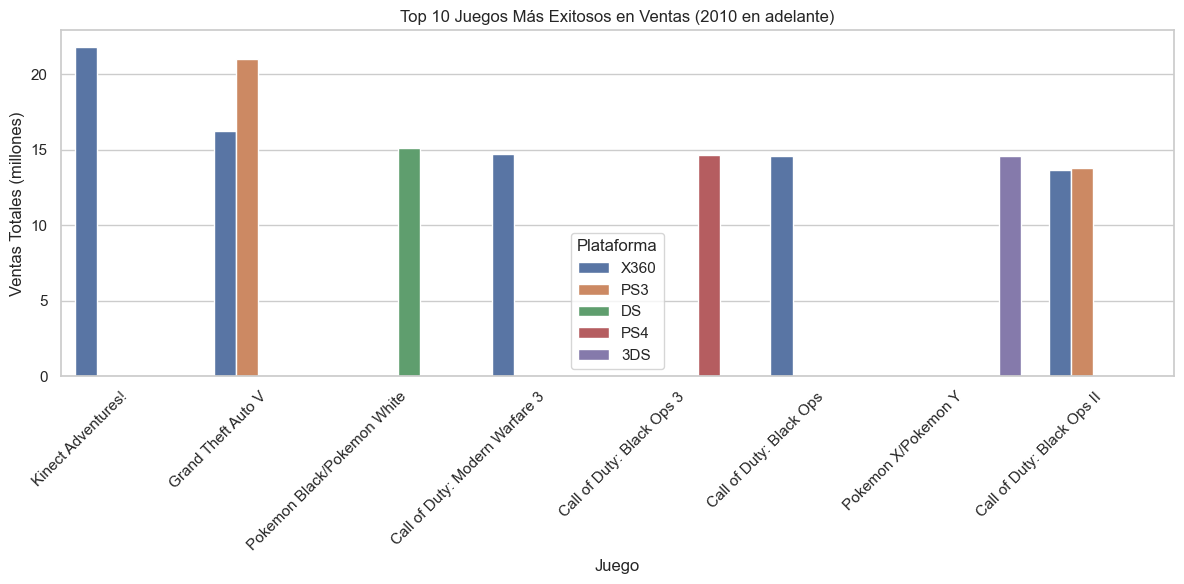

In [1203]:
plt.figure(figsize=(12, 6))
sns.barplot(data=df_top_10_games, x='name', y='total_sales', hue='platform')
plt.title('Top 10 Juegos Más Exitosos en Ventas (2010 en adelante)')
plt.xlabel('Juego')
plt.ylabel('Ventas Totales (millones)')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Plataforma')
plt.tight_layout()
plt.show()

#### Identificar los juegos exitosos que aparecen en otras plataformas

In [1204]:
# Paso 1: Obtener los nombres de los juegos mas exitosos en cada plataforma exitosa
nombres_juegos = df_top_games['name'].unique()

# Paso 2: Contar las ocurrencias de cada juego en df_games_filtered_1
ocurrencias = df_games_filtered_1['name'].value_counts()

# Paso 3: Filtrar los juegos que aparecen en más de una plataforma
juegos_repetidos = ocurrencias[ocurrencias > 1].index

# Paso 4: Filtrar df_games_filtered_1 para incluir solo los juegos que cumplen las condiciones
df_final = df_games_filtered_1[df_games_filtered_1['name'].isin(juegos_repetidos) & 
                             df_games_filtered_1['name'].isin(nombres_juegos)]
df_final=df_final[['name', 'platform', 'total_sales']]

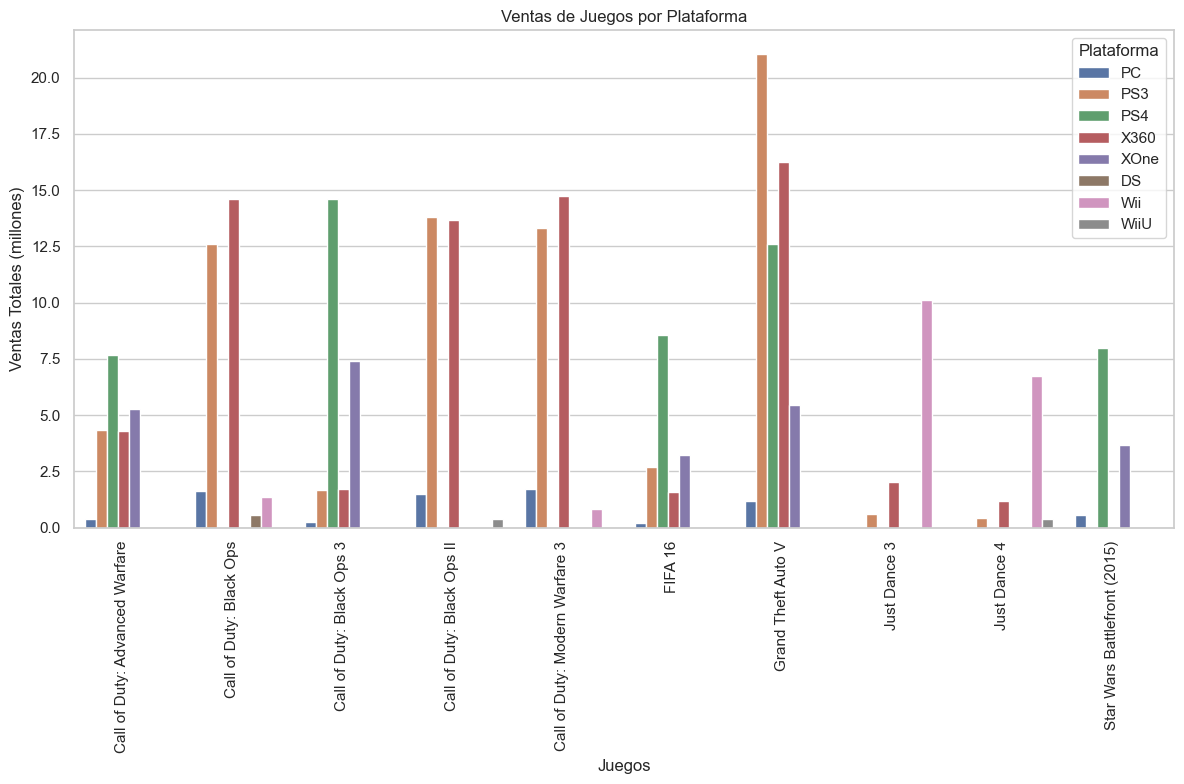

In [1205]:
# Configura el estilo de seaborn
sns.set(style="whitegrid")

# Crear un gráfico de barras
plt.figure(figsize=(12, 8))
sns.barplot(data=df_final, x='name', y='total_sales', hue='platform')
plt.xticks(rotation=90, ha='right')
plt.title('Ventas de Juegos por Plataforma')
plt.xlabel('Juegos')
plt.ylabel('Ventas Totales (millones)')
plt.legend(title='Plataforma')
plt.tight_layout()
plt.show()

**Comentario:**  
El gráfico de barras muestra cómo los juegos más exitosos en ventas suelen estar disponibles en varias plataformas, pero la magnitud de las ventas varía significativamente entre ellas. Por ejemplo, títulos como Grand Theft Auto V y Call of Duty alcanzan sus mayores cifras en plataformas como PS3, X360 y PS4, mientras que en otras como PC, Wii o WiiU sus ventas son considerablemente menores. Esto evidencia que, aunque la popularidad de un juego puede extenderse a diferentes sistemas, el éxito comercial está fuertemente influenciado por la plataforma en la que se lanza, probablemente debido a la base de usuarios y la preferencia del mercado en cada caso.

#### Distribución general de los juegos por género

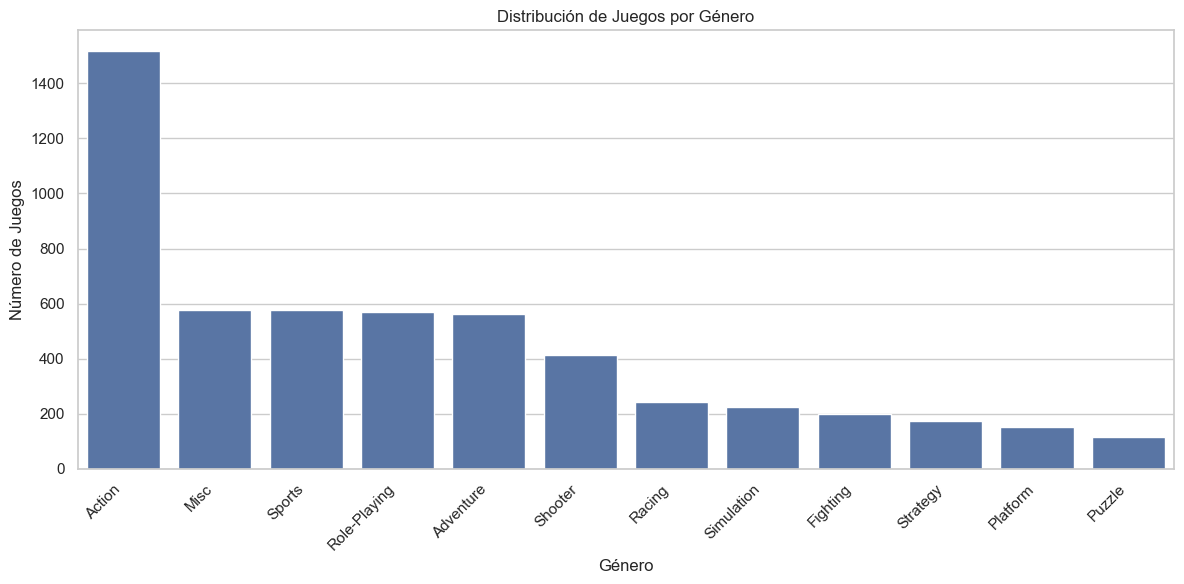

In [1206]:
# Contar el número de juegos por género
genre_counts = df_games_filtered_1['genre'].value_counts()

# Crear un gráfico de barras
plt.figure(figsize=(12, 6))
sns.barplot(x=genre_counts.index, y=genre_counts.values)
plt.xticks(rotation=45, ha='right')
plt.title('Distribución de Juegos por Género')
plt.xlabel('Género')
plt.ylabel('Número de Juegos')
plt.tight_layout()
plt.show()

**Comentario:** En este primer gráfico se observa que la mayor cantidad de juegos pertenece al genero de Action. Podría suponerse que es un género que los usuarios prefieron, por ello la creación de juegos de ese género.

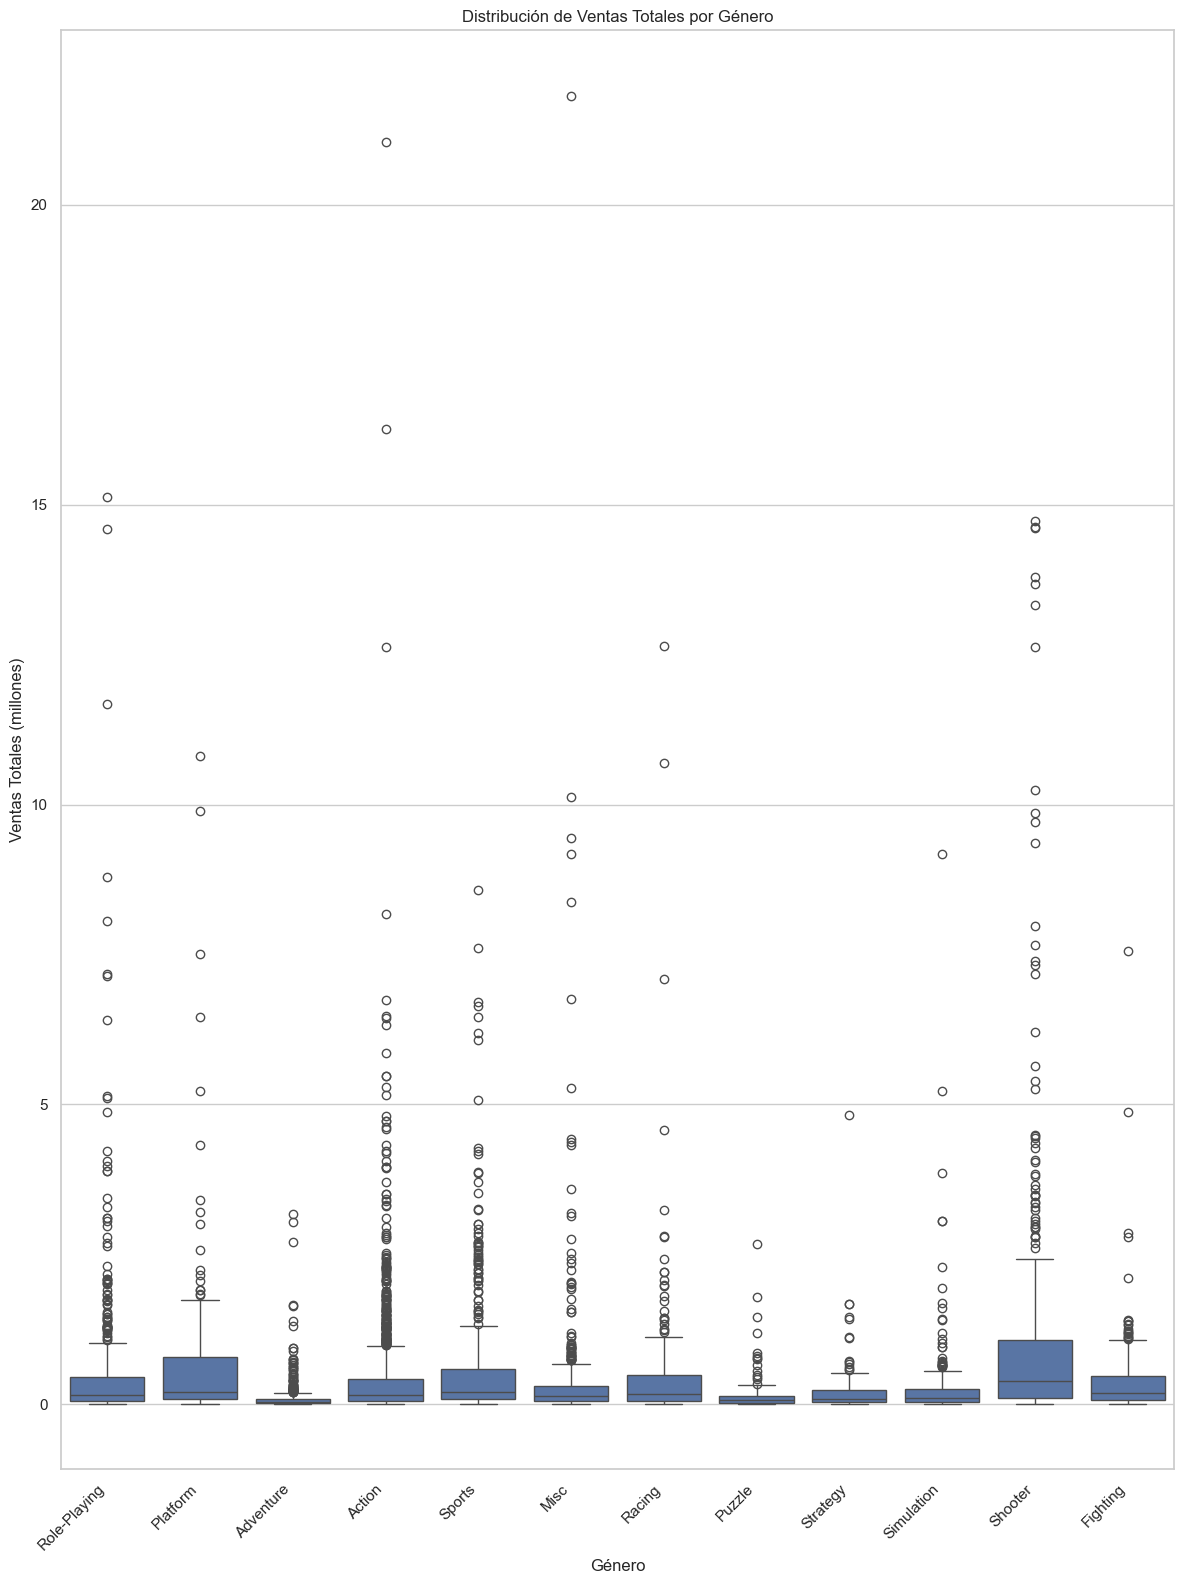

In [1207]:
plt.figure(figsize=(12, 16))

# Crear un gráfico de cajas
sns.boxplot(data=df_games_filtered_1, x='genre', y='total_sales')

# Configurar títulos y etiquetas
plt.title('Distribución de Ventas Totales por Género')
plt.xlabel('Género')
plt.ylabel('Ventas Totales (millones)')
plt.xticks(rotation=45, ha='right')

# Mostrar el gráfico
plt.tight_layout()
plt.show()

**Comentario** Aunque hay algunos juegos que han tenido un rendimiento excepcionalmente bueno (valores atípicos arriba de la caja), la mayoría de los juegos están concentrados en un rango bajo de ventas. Esto podría reflejar un mercado en el que unos pocos títulos (juegos) dominan las ventas, mientras que la mayoría de los otros tienen un desempeño bajo.

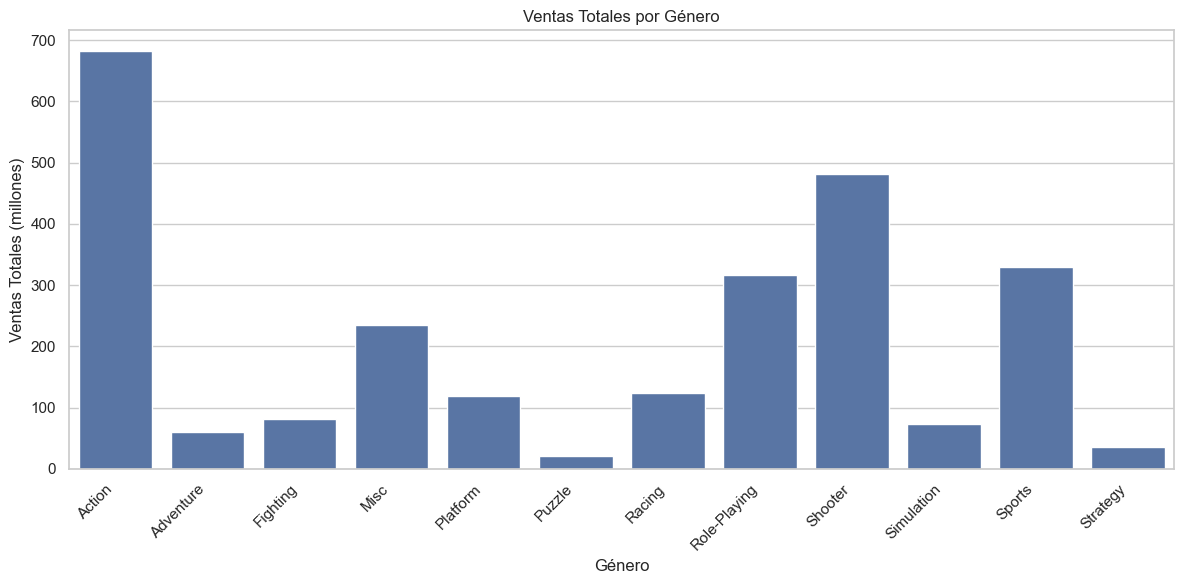

In [1208]:
# Agrupar los datos por género y sumar las ventas totales
ventas_por_genero = df_games_filtered_1.groupby('genre')['total_sales'].sum().reset_index()

# Configurar el tamaño del gráfico
plt.figure(figsize=(12, 6))

# Crear un gráfico de barras
sns.barplot(data=ventas_por_genero, x='genre', y='total_sales')

# Configurar títulos y etiquetas
plt.title('Ventas Totales por Género')
plt.xlabel('Género')
plt.ylabel('Ventas Totales (millones)')
plt.xticks(rotation=45, ha='right')

# Mostrar el gráfico
plt.tight_layout()
plt.show()

**Comentario** Se observa que algunos generos generaron más ventas. Sin embargo, esto no significa que todos los juego de esos generos sean exitosos, ya se ha observado anteriormente que algunos de los generos despuntan en ventas debido a que hay pocos juegos en especifico que son excepcionalmente exitosos en ventas. También se debe considerar la cantidad de juegos que hay en los géneros, un género con una mayor cantidad de juegos ofrece a los consumidores más opciones, lo que aumenta la probabilidad de que encuentren un título que les interese, lo que puede resultar en un mayor volumen de ventas globales para ese género.

#### Cuotas de mercado

In [1209]:
# Calcular las ventas totales por plataforma
# Usar pivot_table para crear el DataFrame deseado
total_sales_by_platform = df_games_filtered_1.pivot_table(
    index=None,                   # No usar índice
    columns='platform',          # Las plataformas serán las columnas
    values=['na_sales', 'eu_sales', 'jp_sales'],  # Valores a pivotar
    aggfunc='sum'                # Sumar las ventas
)
# Renombrar las filas
total_sales_by_platform.rename(index={
    'eu_sales': 'Europa',
    'jp_sales': 'Japón',
    'na_sales': 'Norteamerica'
}, inplace=True)

# Mostrar el DataFrame resultante
total_sales_by_platform

platform,3DS,DS,PC,PS2,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
Europa,61.48,28.34,70.71,1.67,215.26,141.09,7.69,13.12,66.34,25.13,164.67,51.59
Japón,100.62,28.00,0.00,0.80,59.96,15.96,42.65,21.91,17.85,13.01,5.46,0.34
Norteamerica,83.49,60.64,40.16,2.32,230.84,108.74,9.75,12.58,122.77,38.10,336.37,93.12


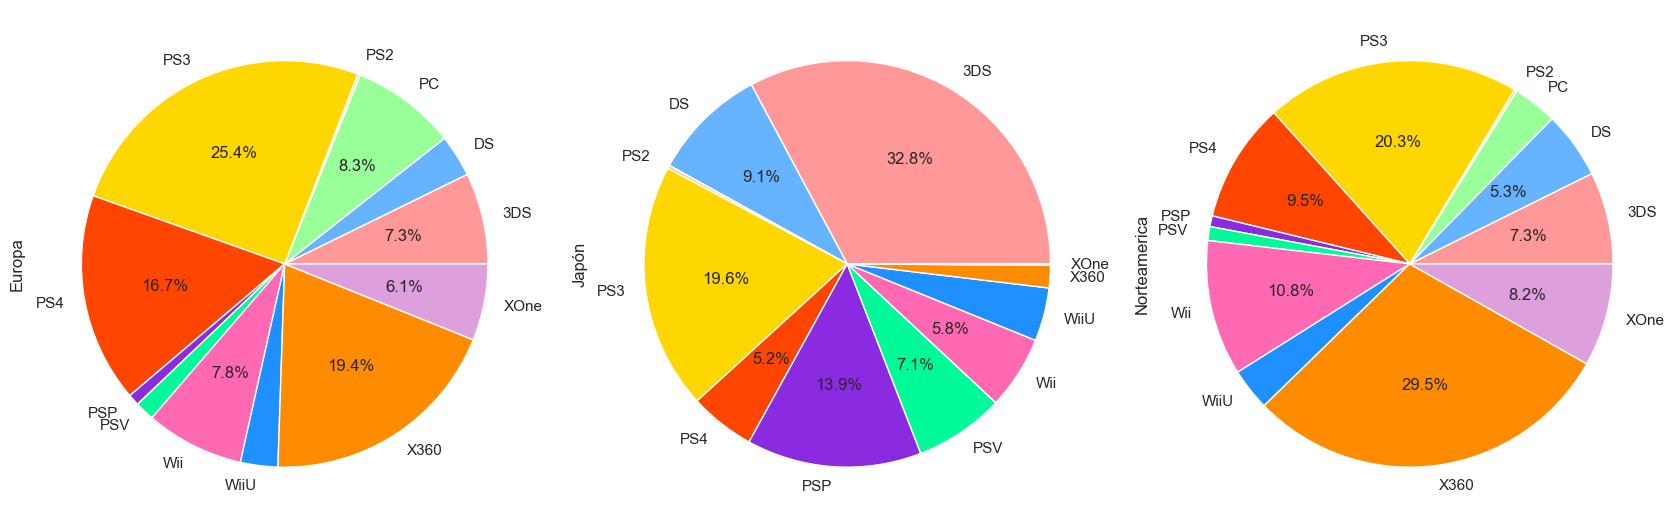

In [1210]:
total_sales_by_platform=total_sales_by_platform.T
# Crear una lista de colores
colors = ['#FF9999', '#66B3FF', '#99FF99', '#FFCC99', '#FFD700', '#FF4500', '#8A2BE2', '#00FA9A', '#FF69B4', '#1E90FF', '#FF8C00', '#DDA0DD']

# Función personalizada para mostrar los porcentajes
def func(pct):
    return f'{pct:.1f}%' if pct >= 5 else ''

# Crear el gráfico de pastel
total_sales_by_platform.plot(kind='pie', autopct=func, colors=colors, figsize=(17, 6), subplots=True, legend=False)

# Ajustar el diseño para que todo el contenido sea visible
plt.tight_layout()

# Mostrar el gráfico
plt.show()

Las 5 plataformas con más cuota de mercado en Europa es PS3, X360, PS4, PC, Wii

Las 5 plataformas con más cuota de mercado en Japon es 3DS, PS3, PSP, DS, PSV

Las 5 plataformas con más cuota de mercado en Norte America es X360, PS3, Wii, PS4, XOne

**Comentario**

Las Plataformas PS3, PS4 y X360 dominan en Europa y Norteamerica, mientras que en Japón la 3DS de Nintendo es la más popular, seguido de PS3. Esto refleja las diferencias culturales y de consumo en cada región. En las tres regiones el PS3 está dentro de las cuotas de mercado más altas. En Japón, a excepcion de la PS3, las plataformas de consolas portátiles como 3DS, PSP, DS y PSV han tenido un gran éxito, lo que refleja la preferencia del mercado japonés por este tipo de dispositivos.

#### Géneros principales

In [1211]:
# Calcular las ventas totales por genero
# Usar pivot_table para crear el DataFrame deseado
total_sales_by_genre = df_games_filtered_1.pivot_table(
    index=None,                   # No usar índice
    columns='genre',          # Los géneros serán las columnas
    values=['na_sales', 'eu_sales', 'jp_sales'],  # Valores a pivotar
    aggfunc='sum'                # Sumar las ventas
)
# Renombrar las filas
total_sales_by_genre.rename(index={
    'eu_sales': 'Europa',
    'jp_sales': 'Japón',
    'na_sales': 'Norteamerica'
}, inplace=True)
# Mostrar el DataFrame resultante
total_sales_by_genre

genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
Europa,236.83,18.88,20.33,66.13,38.30,6.60,55.75,75.65,172.56,26.39,117.06,12.61
Japón,72.92,15.67,13.90,24.53,15.81,3.40,6.70,103.71,14.05,13.32,15.51,7.04
Norteamerica,294.53,20.92,39.05,123.86,54.90,9.65,46.70,112.41,238.52,27.31,157.49,13.54


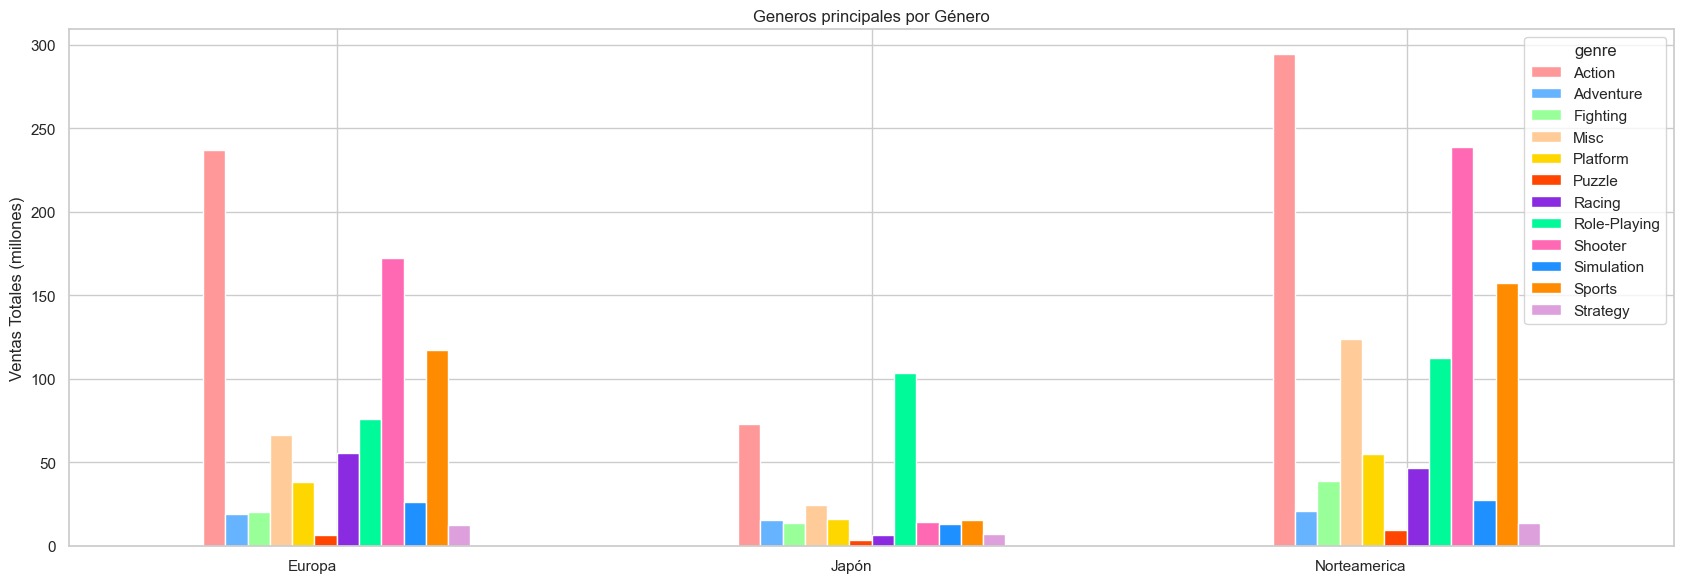

In [1212]:
# total_sales_by_genre=total_sales_by_genre.T
# Crear una lista de colores
colors = ['#FF9999', '#66B3FF', '#99FF99', '#FFCC99', '#FFD700', '#FF4500', '#8A2BE2', '#00FA9A', '#FF69B4', '#1E90FF', '#FF8C00', '#DDA0DD']

# Crear el gráfico de barras
total_sales_by_genre.plot(kind='bar', figsize=(17, 6), color=colors)

# Configurar títulos y etiquetas
plt.title('Generos principales por Género')
plt.ylabel('Ventas Totales (millones)')
plt.xticks(rotation=0, ha='right')

# Ajustar el diseño para que todo el contenido sea visible
plt.tight_layout()

# Mostrar el gráfico
plt.show()

**Comentarios**

Los géneros principales de Europa son :  Action, Shooter, Sports, Role-Playing, Misc. 

Los géneros principales de Japón son : Role-Playing, Action, Misc, Platform, Adventure.

Los géneros principales de Norteamerica son : Action, Shooter, Sports, Misc, Role-Playing.

La diferencia en cifras de ventas entre regiones sugiere que los consumidores tienen diferentes preferencias culturales. Por ejemplo, los juegos de Role-playing son más apreciados en Japón, mientras que los géneros de Action y Shooter son más populares en Norteamérica y Europa. Los juegos de Action están dentro de los 2 géneros más populares en todas las regiones.

#### Verificar si las clasificaciones de ESRB afectan a las ventas en regiones individuales.

In [1213]:
#  Filtrar solo los juegos con clasificaciones de ESRB, no incluir rating pending, nivalores NaN
df_rating_filtered_2 = df_games_filtered_1.query('rating_sem != "rating pending"')

In [1214]:
# Calcular las ventas totales por clasificación
# Usar pivot_table para crear el DataFrame deseado
pivot_table_rating = df_rating_filtered_2.pivot_table(
    index=None,                   # No usar índice
    columns='rating',          # Rating serán las columnas
    values=['na_sales', 'eu_sales', 'jp_sales'],  # Valores a pivotar
    aggfunc='sum'                # Sumar las ventas
)
# Renombrar las filas
pivot_table_rating.rename(index={
    'eu_sales': 'Europa',
    'jp_sales': 'Japón',
    'na_sales': 'Norteamerica'
}, inplace=True)
# Mostrar el DataFrame resultante
pivot_table_rating

rating,E,E10+,EC,M,Pending,RP,T
Europa,197.45,101.26,0.00,294.54,139.76,0.03,114.05
Japón,47.87,13.22,0.00,31.10,172.13,0.00,42.24
Norteamerica,272.85,161.69,1.13,384.61,156.23,0.00,162.37


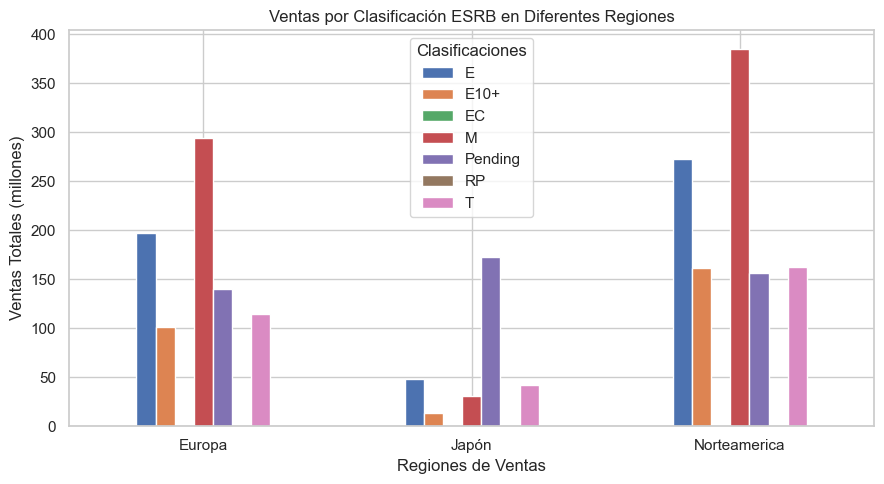

In [1215]:
pivot_table_rating.plot(kind='bar', figsize=(9, 5))

# Configurar el título y las etiquetas
plt.title('Ventas por Clasificación ESRB en Diferentes Regiones')
plt.xlabel('Regiones de Ventas')
plt.ylabel('Ventas Totales (millones)')
plt.xticks(rotation=0)  # Rotar etiquetas del eje x para mayor claridad
plt.legend(title='Clasificaciones')
plt.tight_layout()  # Ajustar el layout para que todo se vea bien

# Mostrar el gráfico
plt.show()

**Comentarios**

Las clasificaciones E (Everyone) y M (Mature) son las que más ventas generan en Norteamerica y Europa. En comparación con las otras regiones , las ventas en Japón son notablemente más bajas en todas las categorías, en Japon las clasificaciones E (Everyone) y T (Teen) son las que lideran en Japón.

### 📉 Pruebas de Hipótesis

#### Correlaciones

**La correlación entre el número de juegos y las ventas totales**

In [1216]:
# Calcular correlación de número de juegos y ventas.
# Contar el número de juegos por plataforma
nro_juegos_por_plataforma = df_games_filtered_1['platform'].value_counts().reset_index()
nro_juegos_por_plataforma.columns = ['platform', 'nro_juegos']

# Sumar las ventas totales por plataforma
ventas_por_plataforma = df_games_filtered_1.groupby('platform')['total_sales'].sum().reset_index()
ventas_por_plataforma.columns = ['platform', 'total_sales']

# Combinar ambos resultados en un nuevo DataFrame
df_correlacion = pd.merge(nro_juegos_por_plataforma, ventas_por_plataforma, on='platform')

# Calcular la correlación
correlation = df_correlacion['nro_juegos'].corr(df_correlacion['total_sales'])

print(f"La correlación entre el número de juegos y las ventas totales es: {correlation}")

La correlación entre el número de juegos y las ventas totales es: 0.7759869047573615


**Comentario** Relación Positiva: A medida que aumenta el número de juegos en una plataforma, las ventas totales tienden a aumentar también. Esto sugiere que las plataformas con más juegos disponibles suelen tener mejores ventas.

**Hipotesis: los que tienen mayor puntaje de criticos y usuarios, tienen mayores ventas**

In [1217]:
# Calcular la correlación entre las puntuaciones de críticos, usuarios y las ventas totales
correlation_scores = df_games_filtered_1[['critic_score', 'user_score', 'total_sales']].corr().round(4)
# Mostrar la matriz de correlación
print("\nMatriz de correlación entre puntuaciones y ventas:")
print(correlation_scores)


Matriz de correlación entre puntuaciones y ventas:
              critic_score  user_score  total_sales
critic_score        1.0000      0.3938       0.2696
user_score          0.3938      1.0000      -0.0237
total_sales         0.2696     -0.0237       1.0000


Las ventas totales tienen una débil correlación positiva con las puntuaciones de críticos (0.27), lo que indica que las críticas profesionales pueden tener alguna influencia en el éxito comercial de un juego.
Sin embargo, no hay relación significativa con las puntuaciones de usuarios, lo que sugiere que la opinión del público no predice directamente las ventas.
Además, la correlación entre críticos y usuarios es moderada, lo que indica cierta alineación, pero no completa.

#### Primera prueba de hipotesis

**Hipótesis nula (H0): Las calificaciones promedio de los usuarios para XOne y PC son iguales.**

**Hipótesis alternativa (H1): Las calificaciones promedio de los usuarios para XOne y PC son diferentes.**

In [1218]:
# Obtener las puntuaciones de usuario para cada plataforma
xone_scores = df_games_filtered_1[df_games_filtered_1['platform'] == 'XOne']['user_score'].dropna()
pc_scores = df_games_filtered_1[df_games_filtered_1['platform'] == 'PC']['user_score'].dropna()

# Realizar la prueba de Levene para verificar la igualdad de varianzas
levene_statistic, levene_p_value = stats.levene(xone_scores, pc_scores)

# Resultado de la prueba de Levene
alpha = 0.05
print(f"Estadístico de Levene: {levene_statistic}")
print(f"Valor p de Levene: {levene_p_value}")

# Determinar si las varianzas son iguales
if levene_p_value < alpha:
    equal_var = False
    print("Las varianzas son diferentes,equal_var:",equal_var)
else:
    equal_var = True
    print("Las varianzas iguales,equal_var:",equal_var)

Estadístico de Levene: 10.716805085086175
Valor p de Levene: 0.0011114912764665138
Las varianzas son diferentes,equal_var: False


In [1219]:
# Realizar la prueba t de Student considerando el resultado de la prueba de Levene
t_statistic, p_value = stats.ttest_ind(xone_scores, pc_scores, equal_var=False)

# Resultados de la prueba t
print(f"Estadístico t: {t_statistic}")
print(f"Valor p: {p_value}")

# Interpretar el resultado de la prueba t
if p_value < alpha:
    print("Rechazamos la hipótesis nula: Las calificaciones promedio son diferentes.")
else:
    print("No rechazamos la hipótesis nula: No hay suficiente evidencia para decir que las calificaciones promedio son diferentes.")

Estadístico t: -1.433159396932121
Valor p: 0.1523485027184936
No rechazamos la hipótesis nula: No hay suficiente evidencia para decir que las calificaciones promedio son diferentes.


**Esto significa que no hay suficiente evidencia para afirmar que las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son diferentes. En otras palabras, se sugiere que las calificaciones promedio son similares entre estas dos plataformas.**

In [1220]:
# Calcular la varianza para las puntuaciones de Xbox One y PC
xone_variance = xone_scores.var()
pc_variance = pc_scores.var()

# Imprimir los resultados
print(f"Varianza de XOne: {xone_variance}")
print(f"Varianza de PC: {pc_variance}")

Varianza de XOne: 141.8224219084296
Varianza de PC: 206.82724189584945


In [1221]:
# Filtrar el DataFrame para las plataformas deseadas
xone_pc_score = df_games_filtered_1[df_games_filtered_1['platform'].isin(['XOne', 'PC'])]

# Obtener el resumen estadístico de user_score agrupado por platform
stats_summary_1 = xone_pc_score.groupby('platform')['user_score'].describe().round(2)

# Mostrar el resultado
print(stats_summary_1)

          count   mean    std   min   25%   50%   75%   max
platform                                                   
PC        488.0  67.38  14.38  14.0  59.0  74.0  75.0  93.0
XOne      247.0  65.95  11.91  16.0  61.0  68.0  72.0  92.0


**Media:**
La calificación promedio para PC es 65.13, y para Xbox One es 65.21. Estas medias son muy cercanas, lo que se alinea con el resultado de la prueba de hipótesis.

**Desviación estándar:**
La desviación estándar para PC (15.64) es un poco mayor que para Xbox One (13.81), lo que indica que las calificaciones en PC son más dispersas en comparación con Xbox One.

**Rango:**
Las calificaciones mínimas y máximas son relativamente similares, lo que sugiere que ambas plataformas tienen una gama de calificaciones similar.

#### Segunda prueba de hipotesis

**Hipótesis nula (H0): Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son iguales.**

**Hipótesis alternativa (H1): Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.**

In [1222]:
# Obtener las puntuaciones de usuario para cada genero
action_scores = df_games_filtered_1[df_games_filtered_1['genre'] == 'Action']['user_score'].dropna()
sports_scores = df_games_filtered_1[df_games_filtered_1['genre'] == 'Sports']['user_score'].dropna()

# Realizar la prueba de Levene para verificar la igualdad de varianzas
levene_statistic, levene_p_value = stats.levene(action_scores, sports_scores)

# Resultado de la prueba de Levene
alpha = 0.05
print(f"Estadístico de Levene: {levene_statistic}")
print(f"Valor p de Levene: {levene_p_value}")

# Determinar si las varianzas son iguales
if levene_p_value < alpha:
    equal_var = False
    print("Las varianzas son diferentes,equal_var:",equal_var)
else:
    equal_var = True
    print("Las varianzas iguales,equal_var:",equal_var)

Estadístico de Levene: 35.669686166006876
Valor p de Levene: 2.7399885650177015e-09
Las varianzas son diferentes,equal_var: False


In [1223]:
# Calcular la varianza para las puntuaciones de género Deporte y Accion.
action_variance = action_scores.var()
sports_variance = sports_scores.var()

# Imprimir los resultados
print(f"Varianza de Action: {action_variance}")
print(f"Varianza de Sports: {sports_variance}")

Varianza de Action: 104.6938917770405
Varianza de Sports: 201.21146705902177


In [1224]:
# Realizar la prueba t de Student considerando el resultado de la prueba levene.
t_statistic, p_value = stats.ttest_ind(action_scores, sports_scores, equal_var=False)

# Resultados
print(f"Estadístico t: {t_statistic}")
print(f"Valor p: {p_value}")

# Interpretar el resultado
alpha = 0.05  # Nivel de significancia
if p_value < alpha:
    print("Rechazamos la hipótesis nula: Las calificaciones promedio son diferentes.")
else:
    print("No rechazamos la hipótesis nula: No hay suficiente evidencia para decir que las calificaciones promedio son diferentes.")

Estadístico t: 7.795838659681288
Valor p: 1.9529201119325522e-14
Rechazamos la hipótesis nula: Las calificaciones promedio son diferentes.


**Hay suficiente evidencia para concluir que las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son significativamente diferentes.**

In [1225]:
# Filtrar el DataFrame para las plataformas deseadas
action_sport_score = df_games_filtered_1[df_games_filtered_1['genre'].isin(['Action', 'Sports'])]

# Obtener el resumen estadístico de user_score agrupado por platform
stats_summary_2 = action_sport_score.groupby('genre')['user_score'].describe().round(2)

# Mostrar el resultado
print(stats_summary_2)

         count   mean    std   min   25%   50%   75%   max
genre                                                     
Action  1516.0  70.10  10.23  16.0  69.0  71.0  76.0  91.0
Sports   577.0  65.06  14.18   2.0  60.0  71.0  74.0  90.0


**Media:**
La calificación promedio para juegos de Action es 67.82, y para Sports es 59.03. La diferencia en las medias sugiere que hay una discrepancia significativa en la calificacion entre estos géneros, lo que se alinea con el resultado de la prueba de hipótesis.

**Desviación estándar:**
La desviación estándar para Sports (16.86) es un poco mayor que para Action (13.60), lo que indica que las calificaciones en Sports son más dispersas en comparación con Action.

**Rango:**
Las calificaciones mínimas y máximas de Action es 16 y 91, lo que sugiere que, aunque la mayoría de los juegos tienen calificaciones razonables, existen juegos que son ampliamente menospreciados.
Las calificaciones mínimas y máximas de Sports es 2 y 90,lo que sugiere que, hay juegos que son extremadamente mal valorados, lo que afecta la media. 

## 7. CONCLUSIONES

1. El ciclo de vida promedio de una plataforma exitosa es de aproximadamente 10 años, por lo que las empresas deben planificar lanzamientos y soporte a largo plazo.
2. Las nuevas plataformas suelen aparecer cada 5-7 años, y las antiguas tardan unos 3 años en perder relevancia tras la llegada de su sucesora. Es clave gestionar bien la transición generacional.
3. Los géneros más populares y rentables varían por región: Action y Shooter dominan en Europa y Norteamérica, mientras que Role-Playing es más fuerte en Japón. Adaptar el catálogo de juegos a las preferencias regionales puede maximizar ventas."
4. Las plataformas con mayor cantidad de juegos tienden a tener mejores ventas totales. Fomentar el desarrollo de títulos para una plataforma ayuda a su éxito comercial.
5. Las clasificaciones ESRB influyen en las ventas regionales: 'Everyone' y 'Mature' son las más exitosas en Europa y Norteamérica, mientras que en Japón destacan 'Everyone' y 'Teen'. Considerar la clasificación al diseñar el catálogo para cada mercado."
6. La correlación entre puntuaciones de críticos/usuarios y ventas es positiva pero débil. El marketing, la marca y otros factores también son determinantes en el éxito comercial.
7. Los juegos multiplataforma suelen tener mejores resultados en ventas, especialmente en las plataformas líderes. Priorizar lanzamientos simultáneos en varias plataformas puede aumentar el alcance.
8. La rápida adopción de nuevas plataformas (ejemplo: PS4) muestra que el mercado responde bien a innovaciones tecnológicas y campañas de lanzamiento efectivas.
9. Las consolas portátiles tienen mayor éxito en mercados como Japón, mientras que las consolas de sobremesa dominan en Europa y Norteamérica. Adaptar la estrategia de hardware según la región es recomendable.
10. Mantener una oferta variada de géneros y títulos exclusivos puede ayudar a diferenciar la plataforma y atraer distintos segmentos de usuarios.
